<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/2.%20Shoppingmall_analysis/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%20%EB%A9%94%EC%9D%B8%ED%8C%8C%EC%9D%BC/shopping_model_.ver2(log).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
# requirements.txt에 들어있지만 되지않은 install
!pip install eli5

In [ ]:
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 나눔바른고딕체 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 프로젝트 목적 

쇼핑몰에 입점한 고객의 데이터를 분석하여 우리에게 가장 많은 가치를 주는 고객을 찾아 다른팀과의 협업을 위해 다양한 인사이트를 얻고, 잘팔리는 상품의 특징과 고객의 판매를 예측하는 모델을 만들자.

< 컬럼 해석 >

|컬럼명|컬럼내용|
|-|-|
|tittle | 상품제목(유럽국가용으로 현지화된 제목)|
|tittle_orig | 원래 영어로된 상품 제목|
|Price |  제품가격|
|retail_price | 소비자 가격(소매가격)|
|currency_buyer | 가격의 통화|
|units_sold | 판매량|
|uses_ad_boosts | 판매자가 플랫폼내에서 광고나 상단고정과 같은 추가 비용 지불여부|
|rating | 평균 제품 등급|
|rating_count | 제품의 등급개수 총합|
|rating_five_count | 별5개등급|
|badges_count|배지 보유 개수|
|badge_local_product | 현지에서 생산된 제품 배지|
|badge_product_quality | 많은 구매자가 지속적으로 좋은 평가 했을때 수여되는 배지|
|badge_fast_shipping | 제품의 주문이 지속적으로 빠르게 배송될때 수여되는 배지|
|tags | 사용자가 설정한 태그 |
|product_color | 제품의 주요 색상|
|product_variation_size_id | 해당 제품의 변경 가능한 사이즈|
|product_variation_inventory | 판매자의 최대 허용 수량|
|shipping_option_name | 배송 옵션(표준배송 등등)|
|shipping_option_price | 배송비|
|shipping_is_express | 배송 급행 여부|
|countries_shipped_to | 상품이 배송가능 한 국가 설정수|
|inventory_total | 모든 제품 변형에 대한 총 재고(크기/ 색상 변형)|
|has_urgency_banner | 긴급한 베너가 있었는지|
|urgency_text | 검색 결과의 일부 제품 위에 나타나는 텍스트 베너|
|origin_country | 원산지|
|merchant_tittle | 판매자의 표시 이름(UI에 판매자 상품 이름으로 표시)|
|merchant_name | 판매자 이름|
|merchant_info_subtitle | 판매자 정보 섹션에 사용자에게 표시되는 자막텍스트|
|merchant_rating_count | 이 판매자의 평가 수|
|merchant_rating | 상인의 평가|
|merchant_id | 판매자 고유 ID|
|merchant_has_profile_picture | merchant_profile_picture의 URL여부|
|merchant_profile_picture | 판매자의 프로필 사진 여부|
|product_url | 제품 페이지에 대한 URL|
|product_picture | 상품 사진 URL|
|product_id | 상품 id|
|theme | 웹사이트에서 상품검색시 사용하는 테마|
|crawl_month | 크롤링한 날짜|


# 1차 전처리

In [ ]:
# 라이브러리
from sklearn.model_selection import train_test_split
from collections import Counter
from wordcloud import WordCloud
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ks_2samp
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,f1_score
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import eli5

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 칼라 저장
pal = ['#50d890', '#007944','#888888','#f3c623','#EFEFEF', '#96bb7c', '#d9bf77','#3f3f44']

In [ ]:
# 데이터 불러오기
df = pd.read_csv('Raw_data.csv')
print(df.shape)
df

(1573, 43)


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

## 프로젝트에서 사용할 데이터프레임 종류
df  : 주로 사용하는것으로 성공판매를 분류로서 바꾸어 진행할 데이터프레임이다.(5,000명이상 성공판매 : 중간에 위치한 판매량 범위)

Raw_df : 판매량을 회귀인 상태 그대로 두어 진행할 데이터프레임으로 분류와 비교하여 시각화를 하기 위한 데이터프레임이다.

another_df : 성공판매를 10,000명이상인 경우로 분류한 데이터 프레임이다.(실제 wish사이트의 인기제품에 해당하는것중 판매는 10,000개를 기준으로 한 상품이 가장 많았기 때문에 해당기준에 맞는 데이터프레임도 만들어주었다.)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
print(f'데이터의 총 개수는 : {len(df)}개')
print('-'*50)
round(df.isnull().mean().sort_values(ascending =False)*100)

데이터의 총 개수는 : 1573개
--------------------------------------------------


merchant_profile_picture        86.0
has_urgency_banner              70.0
urgency_text                    70.0
rating_one_count                 3.0
rating_two_count                 3.0
rating_three_count               3.0
rating_four_count                3.0
rating_five_count                3.0
product_color                    3.0
origin_country                   1.0
product_variation_size_id        1.0
merchant_name                    0.0
merchant_info_subtitle           0.0
crawl_month                      0.0
badges_count                     0.0
rating_count                     0.0
badge_product_quality            0.0
rating                           0.0
uses_ad_boosts                   0.0
units_sold                       0.0
currency_buyer                   0.0
retail_price                     0.0
price                            0.0
title_orig                       0.0
badge_local_product              0.0
product_variation_inventory      0.0
badge_fast_shipping              0.0
m

## 결측값 처리

In [ ]:
# 결측값 제거 

# 결측비율 70% 이상 컬럼 삭제
df = df.drop(columns = ['merchant_profile_picture', 'has_urgency_banner', 'urgency_text'])

# rating_one_count ~ _five_count 는 분석에 사용할 컬럼이며, 결측값이 작아서 삭제
list = []
for i in df[df['rating_one_count'].isnull() == True].index:
  list.append(i)
df = df.drop(index = list)

# origin_country의 대부분이 'CN'이므로 해당값으로 치환
df['origin_country'] = df['origin_country'].fillna('CN')

# 변경가능한 사이즈는 종류가 105개로 각기 다른기준으로 구분되어있어 컬럼을 삭제
df = df.drop(columns = 'product_variation_size_id')



print(f'결측값 제거후 남은 데이터의 수: {len(df)}')

결측값 제거후 남은 데이터의 수: 1528


In [ ]:
# 상품색상 결측값 데이터 확인

# 앞선 결측값제거로 인한 인덱스 초기화
df = df.reset_index().drop(columns = 'index')

# 상품 색상 결측값 확인 
print(len(df.loc[df['product_color'].isna() == True]))

# 직접 url로 상품을 확인후 결측값을 채워준다.
df.loc[df['product_color'].isna() == True][['product_color','product_url']]

38


,product_color,product_url
26,NaN,https://www.wish.com/c/5b5edbae1e222732845e655f
30,NaN,https://www.wish.com/c/5c9d920da94960780239d468
146,NaN,https://www.wish.com/c/58e0f38f9bf29f55183efd0d
278,NaN,https://www.wish.com/c/5c935aa8778e8274b0bdcead
448,NaN,https://www.wish.com/c/5e70ba09e3d51e1002f7cf8e
486,NaN,https://www.wish.com/c/569de6363e68eb0d85e0cded
533,NaN,https://www.wish.com/c/56f640b461d6cf68cb5c5d83
570,NaN,https://www.wish.com/c/59636dbdc657d57012e8b3f3
572,NaN,https://www.wish.com/c/5ac302716931da0d71398f53
618,NaN,https://www.wish.com/c/5e7e0c35e27371898f419f5d


직접 상품의 링크에 접속해서 색깔정보를 채워넣기(손크롤링)

In [ ]:
# 상품색상 결측값 채우기
df.iloc[26,19] = 'white'
df.iloc[30,19]= 'black'
df.iloc[146,19] = 'rainbow'
df.iloc[278,19] = 'black'
df.iloc[486,19] = 'black'
df.iloc[533,19] = 'white'
df.iloc[570,19] = 'mintgreen'
df.iloc[572,19] = 'black'
df.iloc[623,19] = 'black'
df.iloc[624,19] = 'black'
df.iloc[645,19] = 'black'
df.iloc[673,19] = 'white'
df.iloc[712,19] = 'white'
df.iloc[818,19] = 'white'
df.iloc[855,19] = 'rainbow'
df.iloc[990,19] = 'mintgreen'
df.iloc[1008,19] = 'blue'
df.iloc[1033,19] = 'pink'
df.iloc[1067,19] = 'rainbow'
df.iloc[1072,19] = 'white & black'
df.iloc[1079,19] = 'white'
df.iloc[1085,19] = 'white'
df.iloc[1425,19] = 'white'

# 상품확인결과 색상 구분이 어려운 기타물건 삭제
df = df.drop(index = [448, 618, 690, 830, 944, 988, 997, 1004, 1083, 1152, 1301, 1330, 1427, 1431, 1463])

In [ ]:
print(f'데이터의 총 개수는 : {len(df)}개')
print('-'*50)
round(df.isnull().mean().sort_values(ascending =False)*100)

데이터의 총 개수는 : 1513개
--------------------------------------------------


merchant_name                   0.0
tags                            0.0
badge_product_quality           0.0
badge_local_product             0.0
badges_count                    0.0
rating_one_count                0.0
rating_two_count                0.0
rating_three_count              0.0
rating_four_count               0.0
rating_five_count               0.0
crawl_month                     0.0
rating_count                    0.0
rating                          0.0
uses_ad_boosts                  0.0
units_sold                      0.0
currency_buyer                  0.0
retail_price                    0.0
price                           0.0
title_orig                      0.0
badge_fast_shipping             0.0
product_color                   0.0
theme                           0.0
product_variation_inventory     0.0
product_id                      0.0
product_picture                 0.0
product_url                     0.0
merchant_has_profile_picture    0.0
merchant_id                 

In [ ]:
# 판매자의 이름 결측값 처리
df.loc[df['merchant_name'].isnull()==True] # 판매자 이름의 결측값은 모두 같은 사람이므로 임시로 하나의 이름으로 채워준다.
df['merchant_name'] = df['merchant_name'].fillna('jeongseok') # 판매자 이름을 jeongseok으로 임시로 채워주었다.

## 사용하지 않는 컬럼 제거

In [ ]:
# 유럽언어제목을 삭제한 후 영어제목을 title로 변경
df = df.drop(columns = 'title')
df.rename(columns={'title_orig':'title'},inplace=True)

# 따로 분석을 해본 결과  소매가격과 실제가격의 차이만으로 의미를 찾을 수없었다.
df = df.drop(columns = ['retail_price'])

# 통화는 모두 EUR사용하기 때문에 삭제
df = df.drop(columns = ['currency_buyer'])

# 테마는 모두 여름이고, 크롤링 날짜 또한 같은날 진행하였기 때문에 삭제
df = df.drop(columns = ['theme', 'crawl_month'])

# URL은 모델에 사용할 수 있는 컬럼이 아니고 인사이트도 없기 때문에 제거
#df = df.drop(columns = ['product_picture', 'product_url']) url은 중복인사이트를 뽑을 때 사용
df = df.drop(columns = 'product_picture')
# 판매자 이름은 판매자 id와 겹치고 이름은 결측값이 존재하나 id는 결측값이 존재하지 않는다.
# 중복값 또한 동일하기 때문에 삭제하여 준다. 
df = df.drop(columns = ['merchant_name'])


# 필요없는 컬럼 삭제(merchant_info_subtitle,merchant_title : 불필요한 텍스트/ inventory_total : 사용하지 않을 결측값)
df = df.drop(columns = ['merchant_info_subtitle', 'inventory_total', 'merchant_title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1527
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1513 non-null   object 
 1   price                         1513 non-null   float64
 2   units_sold                    1513 non-null   int64  
 3   uses_ad_boosts                1513 non-null   int64  
 4   rating                        1513 non-null   float64
 5   rating_count                  1513 non-null   int64  
 6   rating_five_count             1513 non-null   float64
 7   rating_four_count             1513 non-null   float64
 8   rating_three_count            1513 non-null   float64
 9   rating_two_count              1513 non-null   float64
 10  rating_one_count              1513 non-null   float64
 11  badges_count                  1513 non-null   int64  
 12  badge_local_product           1513 non-null   int64  
 13  bad

## 중복 판매자, 중복 상품 분석

< 확인하고자 하는것 >

1. 상품이 같을때 판매자역시 같은것 -> 다른 컬럼 확인후 중복데이터 여부 확인
2. 상품이 같은데 판매자가 다를경우 -> 판매자별 판매량 비교해보기(같은상품이 판매자에따라 어떤 차이를 보이는지)
3. 판매자가 같을때 상품이 다른경우 -> 같은판매자가 여러 상품을 판매하는경우(판매를 잘하는 판매자인지 혹은 특정상품만 잘팔거나 못파는지 여러가지 인사이트 찾아보기/ 따라서 판매자가 중복인경우는 지우지 않아도 되는데이터들이 많을것으로 예상)

In [ ]:
# 중복갯수 확인하기
print('상품의 중복값 갯수 : ', df['product_id'].duplicated().sum())
print('판매자 중복값 갯수 : ', df['merchant_id'].duplicated().sum())

상품의 중복값 갯수 :  221
판매자 중복값 갯수 :  590


In [ ]:
# 상품값이 중복인 데이터의 다른컬럼 확인
df[df['product_id'].duplicated()==True][['product_id','merchant_id','units_sold','product_url']].sort_values(by='product_id',ascending= False).head(60) 

,product_id,merchant_id,units_sold,product_url
823,5ef0ef11f30aba4e22166d4b,5d50fb2b1d9a8e23e3334c81,100,https://www.wish.com/c/5ef0ef11f30aba4e22166d4b
963,5eeef4c4066647a9388a8ac2,5e2ecb9deed5087a7ba2f5f7,10,https://www.wish.com/c/5eeef4c4066647a9388a8ac2
281,5ee8875404718a4bba2d6348,5e3c5fbfe217d492138970c1,50,https://www.wish.com/c/5ee8875404718a4bba2d6348
969,5ee8875404718a4bba2d6348,5e3c5fbfe217d492138970c1,50,https://www.wish.com/c/5ee8875404718a4bba2d6348
405,5edf3082e066d71501a40c73,583da4b58108913e6c79a32e,50,https://www.wish.com/c/5edf3082e066d71501a40c73
748,5edf07e70b313014b48a7450,577fb2b368116418674befd9,100,https://www.wish.com/c/5edf07e70b313014b48a7450
724,5edb2db0fcc85c2e12014395,5e686e632fb13f0b010b6cd0,50,https://www.wish.com/c/5edb2db0fcc85c2e12014395
1526,5eda07ab0e295c2097c36590,5d56b32c40defd78043d5af9,100,https://www.wish.com/c/5eda07ab0e295c2097c36590
1445,5ed9df5dd6223e34697f9024,57885a8c090d40723d2105e3,100,https://www.wish.com/c/5ed9df5dd6223e34697f9024
758,5ed9de39b6befd33de8dd908,5d5a520c560eca48d7f140eb,50,https://www.wish.com/c/5ed9de39b6befd33de8dd908


위의결과로는 확인하기 힘들어보인다. 다른방법을 사용해 보자

In [ ]:
# 중복값 추출
id_list = []
for i in df['product_id']:
  if df[df['product_id']==i]['product_id'].count() >1:
    id_list.append(i)
  else:
    pass
id_list

['5cedf17ad1d44c52c59e4aca',
 '5ebf5819ebac372b070b0e70',
 '5ec49d527d7044ccfa3f1c04',
 '5d1db3c0e2b5cc0f74e091af',
 '5cf648ce373ac2069fd6317d',
 '5c80e8a150c63d28c67b8f14',
 '5d2fd5a9af7a0c5b21369a05',
 '5ea69521f5e1e65a3c70faa8',
 '5e9a74e447f7d92c8db8d14b',
 '5c9212fc8de79667e3c7ca59',
 '5ea2877224b9643185e52b58',
 '5d806ae97c339c307264cf76',
 '5ebb9faea86f7a4d86e2f6fb',
 '5e81acbde187530740f207c6',
 '5ed1b644b1e34008ce012d4b',
 '5ebff6d34a4cf4438dba5d80',
 '5ebf5819ebac372b070b0e70',
 '5d04e3db2ec1245228829a64',
 '5aec22cec25735338c544690',
 '5e940265ea3640c9ca0353aa',
 '5b0386696040cc41f2331c83',
 '5d5d038d99df1e17cc9313cf',
 '5ccd341e8cc067595fcba7c4',
 '5ec773b5967eb036b2c2e668',
 '5d0b4268d5c8e1784b6e23b4',
 '5d78eb19cc404c03393c83b5',
 '5d5d038d99df1e17cc9313cf',
 '5ebe0ead593b960eb1c82d0b',
 '5d1db3c0e2b5cc0f74e091af',
 '5eaa6d9c8d99eb3ec06709f4',
 '5e1bd924d7be4445acfa8c6d',
 '5e9915ef9fae4f26f32f15df',
 '5e743eded2656b046017c719',
 '5edb2db0fcc85c2e12014395',
 '5eb4dd169263

In [ ]:
# 같은값은 붙여서 정렬
id_list.sort()
# 중복상품 총 갯수확인(unique값이 아님)
len(id_list)

422

In [ ]:
# 중복제거(중복값들의 고유한 값 추출)
result =[]
for i in id_list:
  if i not in result:
    result.append(i)

print(result)
print(len(result))

['5577faf03cef83230c39d0c3', '57639e8824841762459c5e5c', '58db2a4eca5fec55a2b176a8', '591c6e86681f5f27332330ce', '592bc443f4fbb234d2e85852', '5936611a08f45940ce8b5e01', '594c7f0082f9b070a355c94c', '594dcfd3346d4b7048be7495', '5a38f6e0fc8e5b063a250db6', '5a93ab421c6def23e6f0c878', '5abb1309dc0c285e4eb675a8', '5ae9344787ff841c9ab69b79', '5aec22cec25735338c544690', '5af406469be1de3b00f73128', '5af40bb2f281cb017ec17012', '5b0386696040cc41f2331c83', '5b6021aee07ac6197df2d097', '5ba4f816c1a38516a0cb12d9', '5bac96d54b784e1e83636983', '5bb6cfd4e0334021219d5d2f', '5bcd4a045d689f171be1655b', '5c340c2b31825e42ca62d69a', '5c3c4a7f97fd8d386bae82f2', '5c6bb167314806702b1b55ca', '5c80e8a150c63d28c67b8f14', '5c88742f9a4d0e68dc7148c2', '5c90908b8625751a972408f1', '5c9212fc8de79667e3c7ca59', '5c984d7e082de24a302cc559', '5ca084765e18c31890903f2a', '5ca2f72d96d90c7ed661b692', '5cabfcdc32227053f6254ee6', '5cbdabea787e5828c3059a6c', '5cbe81430aa3a4566e6ee369', '5cc01186416a307424603aba', '5cc7b4c98b94871ee3

In [ ]:
# 상품 하나당 중복된 merchant_id의 갯수 최대값 확인해 보기

m_list = []

for i in pd.DataFrame(result).values:
  for j in i: # merchant_id추출을 위한 중첩반복문 사용
    mi = df.loc[df['product_id']==j]['merchant_id'].values # merchant_id 추출
    m_list.append(len(mi)) # product_id당 merchant_id의 갯수를 리스트에 추가
    print(m_list[-1])

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
3
2
3
3
2
2
2
3
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2


상품당 판매자가 겹치는경우 2명 혹은 3명이다.

In [ ]:
# 상품이 같을때 판매자 추출(판매자가 같을경우 판매량 확인을 통해 같은값인지 여부확인)
for i in pd.DataFrame(result).values:
  for j in i: # merchant_id추출을 위한 중첩반복문 사용
    mi = df.loc[df['product_id']==j]['merchant_id'].values # merchant_id 추출
    if len(mi) == 2: # 같은상품에 판매자가 2명일경우
      if mi[0] == mi[1]:
       print(j, ':','판매량 확인')
      else:
        print(j,':', mi,end = '\n\n')
    elif len(mi) ==3:# 같은상품에 판매자가 3명일경우
      if mi[0] == mi[1] and mi[1] ==mi[2]:
        print(j, ':','판매량 확인')
      else:
        print(j,':', mi,end = '\n\n')

5577faf03cef83230c39d0c3 : 판매량 확인
57639e8824841762459c5e5c : 판매량 확인
58db2a4eca5fec55a2b176a8 : 판매량 확인
591c6e86681f5f27332330ce : 판매량 확인
592bc443f4fbb234d2e85852 : 판매량 확인
5936611a08f45940ce8b5e01 : 판매량 확인
594c7f0082f9b070a355c94c : 판매량 확인
594dcfd3346d4b7048be7495 : 판매량 확인
5a38f6e0fc8e5b063a250db6 : 판매량 확인
5a93ab421c6def23e6f0c878 : 판매량 확인
5abb1309dc0c285e4eb675a8 : 판매량 확인
5ae9344787ff841c9ab69b79 : 판매량 확인
5aec22cec25735338c544690 : 판매량 확인
5af406469be1de3b00f73128 : 판매량 확인
5af40bb2f281cb017ec17012 : 판매량 확인
5b0386696040cc41f2331c83 : 판매량 확인
5b6021aee07ac6197df2d097 : 판매량 확인
5ba4f816c1a38516a0cb12d9 : 판매량 확인
5bac96d54b784e1e83636983 : 판매량 확인
5bb6cfd4e0334021219d5d2f : 판매량 확인
5bcd4a045d689f171be1655b : 판매량 확인
5c340c2b31825e42ca62d69a : 판매량 확인
5c3c4a7f97fd8d386bae82f2 : 판매량 확인
5c6bb167314806702b1b55ca : 판매량 확인
5c80e8a150c63d28c67b8f14 : 판매량 확인
5c88742f9a4d0e68dc7148c2 : 판매량 확인
5c90908b8625751a972408f1 : 판매량 확인
5c9212fc8de79667e3c7ca59 : 판매량 확인
5c984d7e082de24a302cc559 : 판매량 확인
5ca084765e18c3

모두가 "판매량 확인" 으로 출력이 됨으로서 중복값들의 판매자는 모든 같은 사람인것으로 확인되었다. 그렇다면 판매량과, URL비교를 통해서 에러인지 혹은 같은판매자가 복수번 판매한것인지 확인해 봐야한다.

In [ ]:
# 상품과 url중복값을 통해 일치여부 파악2
test = pd.DataFrame(result)
test_df = pd.merge(test, df[['product_id','merchant_id','units_sold','product_url']],how = 'left', left_on= 0, right_on = df['product_id'] ) # 같은상품의 같은판매자일때 판매량과 url은같은지?
test_df.head(50)

,0,product_id,merchant_id,units_sold,product_url
0,5577faf03cef83230c39d0c3,5577faf03cef83230c39d0c3,54125ab34ad3ab158c0f72d9,10000,https://www.wish.com/c/5577faf03cef83230c39d0c3
1,5577faf03cef83230c39d0c3,5577faf03cef83230c39d0c3,54125ab34ad3ab158c0f72d9,10000,https://www.wish.com/c/5577faf03cef83230c39d0c3
2,57639e8824841762459c5e5c,57639e8824841762459c5e5c,5760bd976238335e38551943,20000,https://www.wish.com/c/57639e8824841762459c5e5c
3,57639e8824841762459c5e5c,57639e8824841762459c5e5c,5760bd976238335e38551943,20000,https://www.wish.com/c/57639e8824841762459c5e5c
4,58db2a4eca5fec55a2b176a8,58db2a4eca5fec55a2b176a8,58c35950e2de036da9e2b570,1000,https://www.wish.com/c/58db2a4eca5fec55a2b176a8
5,58db2a4eca5fec55a2b176a8,58db2a4eca5fec55a2b176a8,58c35950e2de036da9e2b570,1000,https://www.wish.com/c/58db2a4eca5fec55a2b176a8
6,591c6e86681f5f27332330ce,591c6e86681f5f27332330ce,5705e40cfda6252c1a9db062,10000,https://www.wish.com/c/591c6e86681f5f27332330ce
7,591c6e86681f5f27332330ce,591c6e86681f5f27332330ce,5705e40cfda6252c1a9db062,10000,https://www.wish.com/c/591c6e86681f5f27332330ce
8,592bc443f4fbb234d2e85852,592bc443f4fbb234d2e85852,53e442474497c57e900d7c64,10000,https://www.wish.com/c/592bc443f4fbb234d2e85852
9,592bc443f4fbb234d2e85852,592bc443f4fbb234d2e85852,53e442474497c57e900d7c64,10000,https://www.wish.com/c/592bc443f4fbb234d2e85852


눈 대중으로는 같은상품의 정보는 다 같아보인다. 확실하게 하기 위해 아래에서 최종 정검을 해보자.

In [ ]:
# 전체중복값 확인
print('전체 중복값 갯수 :', test_df.duplicated().sum())
# 상품과 url중복값을 통해 일치여부 파악1
print('상품의 중복값 갯수 : ', df['product_id'].duplicated().sum())
print('url 중복값 갯수 : ', df['product_url'].duplicated().sum())

전체 중복값 갯수 : 221
상품의 중복값 갯수 :  221
url 중복값 갯수 :  221


전체중복값이 상품id와 상품 url의 중복값과 같으므로 test_df에 있는 값들은 중복값들을 불러온 데이터가 맞으며, 크롤링과정의 에러로 보인다. 따라서 이들을 unique한 값으로 만든다.

In [ ]:
# product_id, product_url 중복값 삭제
df.drop_duplicates(subset= ['product_id', 'product_url'], keep = 'first',inplace = True)

In [ ]:
# 중복값 제거 후 확인
print('상품의 중복값 갯수 : ', df['product_id'].duplicated().sum())
print('url 중복값 갯수 : ', df['product_url'].duplicated().sum())

상품의 중복값 갯수 :  0
url 중복값 갯수 :  0


In [ ]:
# 중복값 제거후 인덱스 초기화 
df = df.reset_index()
df = df.drop(columns = 'index')
df

,title,price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,50,Livraison standard,4,0,34,CN,568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,50,Livraison standard,2,0,41,CN,17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,1,Livraison standard,3,0,36,CN,295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,50,Livraison standard,2,0,41,CN,23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,1,Livraison standard,1,0,35,CN,14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,New Summer Fashion Trousers Women Leggings Rip...,3.00,100,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",skyblue,1,Livraison standard,1,0,41,CN,4080,3.987990,584a7a381591451e4e3af3df,0,https://www.wish.com/c/5e8f0165e815903d022a3c7c,5e8f0165e815903d022a3c7c
1288,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,20000,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",black,50,Livraison standard,2,0,44,CN,16803,4.155032,56455b13b15aab129db58cb7,0,https://www.wish.com/c/5c91a7ae7cfe8e4e64c36d97,5c91a7ae7cfe8e4e64c36d97
1289,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,50,Livraison standard,2,0,41,CN,5316,4.224605,5b507899ab577736508a0782,0,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,5d5fadc99febd9356cbc52ee
1290,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,15,Livraison standard,2,0,11,CN,210,3.961905,5b42da1bf64320209fc8da69,0,https://www.wish.com/c/5e74be96034d613d42b52dfe,5e74be96034d613d42b52dfe


상품이 중복된것은 url도 같이 중복이다. 이를 통해 상품과 url의 중복은 크롤링과정에서 잘못가져온것으로 보인다. 

따라서, 상품의 중복은 모두 잘못 긁어온것이므로 얻을 수 있는 인사이트는 없으며, 판매자 id중복 확인으로 넘어가자.

In [ ]:
# 고객id중복 갯수 확인
df['merchant_id'].duplicated().sum()

369

In [ ]:
# 중복제거(한고객이 여러제품을 판매할때 고객의 고유의 값 추출)
result =[]
for i in df['merchant_id']:
  if i not in result:
    result.append(i)

print(result)
print(len(result))

['595097d6a26f6e070cb878d1', '56458aa03a698c35c9050988', '5d464a1ffdf7bc44ee933c65', '58cfdefdacb37b556efdff7c', '5ab3b592c3911a095ad5dadb', '5e4b9c3801ba9d210036fc5a', '5652f4053a698c76dc9a3f37', '5d45349676befe65691dcfbb', '5d42980e8388970d32294ddc', '5ba2251b4315d12ebce873fa', '5952a218e81e8a4c30b5bbbc', '56cd27b048e91e13aa3986e4', '5d3c419de4b65d4fb81e7286', '566eaa533a698c6442549a74', '5926c5ace8ff5525241b368d', '566012f6769a5629aefca555', '5b8beef49996c87b299cdbec', '5708773c3c02161b3f8c7900', '59cdc2112351344fc0dfa54f', '5ae296b6cd968d66be12d247', '5576bb43de4a8c24953ae98f', '55ed5a3362e273427107759e', '5ae93337d204cc177313f242', '5cb636dda7173671aedef051', '583138b06339b410ab9663ec', '575cfe470551415caa5505b5', '5a0fe8770a332a615df86c5e', '56c6f731bc435416ed5984d7', '58ba636a69ad29505a730852', '5adef3559d5e9767b3177472', '539937d634067e06707b1a8e', '54d30f53dc8ce133f79b434d', '5d49403060c79c113a908720', '547bdd648edcfa5656cac810', '582833faea77701b456c786a', '559d33adc605853731

### 여러상품을 판매중인 고객 추출 및 등급 부여

여러상품을 판매한경우 상품마다 고객의id가 생기므로 중복이 될 수 있다.

In [ ]:
# 고유의 고객id에 대한 보유 상품 id확인(2개이상이라면 해당하는 상품의 리스트와 인덱스를 추출(앞서 상품 중복제거를 해서 동일상품이 나올수는 없다.)

multi_product = 0

for i in result: # 중복제거된 고유의 고객id 리스트
  product_list = df[df['merchant_id']==i]['product_id'].values # 상품id 값
  product_index = df[df['merchant_id']==i]['product_id'].index.values # 상품id의 index

  # 고객당 상품이 1대1이면 추가 분석할필요 없기때문에 2개이상으로 필터
  if len(product_list) >=2: 
    print('[ 고객ID ] :',i,'/','[ 상품ID ] :',product_list,'/','(',len(product_list),'개)','>>>>>',product_index, end = '\n') # 출력 ->  고객id : 상품 id(상품갯수)
    print('-'*135)
    multi_product +=1
print('2개이상의 상품을 가진 회원수',multi_product)

[ 고객ID ] : 56458aa03a698c35c9050988 / [ 상품ID ] : ['58940d436a0d3d5da4e95a38' '5df2576d68963c1660471f9a'
 '5d58daef3159a812b05933d2' '5e9fa7de39682a0043ab7898'] / ( 4 개) >>>>> [   1  861  999 1048]
---------------------------------------------------------------------------------------------------------------------------------------
[ 고객ID ] : 58cfdefdacb37b556efdff7c / [ 상품ID ] : ['5cedf17ad1d44c52c59e4aca' '5ec23bea8bef5b2d1d994b95'
 '5c6a4bbb3abfb51118b000ca'] / ( 3 개) >>>>> [   3  368 1197]
---------------------------------------------------------------------------------------------------------------------------------------
[ 고객ID ] : 5ab3b592c3911a095ad5dadb / [ 상품ID ] : ['5ebf5819ebac372b070b0e70' '5d07120c11e6065641900fc4'] / ( 2 개) >>>>> [  4 872]
---------------------------------------------------------------------------------------------------------------------------------------
[ 고객ID ] : 5ba2251b4315d12ebce873fa / [ 상품ID ] : ['5ccfaf238a8d535cec2dfb47' '5cde482084913617975abc

고객이 여러상품을 판매하는 경우가 적지않다.

 고객id의 중복은 상품이 복수 이므로 지워서는 안되는 중복값이다.

In [ ]:
# 판매자의 판매상품수에 따른 등급 배분

# 새로운 컬럼 생성
df['판매상품수량 등급']  = '일반회원'

# 판매왕 : 10개 이상 상품 게시/ 최고급 판매원 : 7개 이상 상품게시
# 고급 판매원 : 5개 이상 상품 게시/ 부스터 회원 : 3개이상 상품게시
for i in result:
  product_index = df[df['merchant_id']==i]['product_id'].index.values
  if len(product_index) >=10:
    for j in product_index:
      df.iloc[j,29] = df.iloc[j,29].replace('일반회원','판매왕')

  elif len(product_index) >=7 and len(product_index) <10:
    for j in product_index:
     df.iloc[j,29] = df.iloc[j,29].replace('일반회원','최고급 판매원')

  elif len(product_index) >=5 and len(product_index) <7:    
    for j in product_index:
      df.iloc[j,29] = df.iloc[j,29].replace('일반회원','고급 판매원')     

  elif len(product_index) >=3 and len(product_index) <5:  
    for j in product_index:
      df.iloc[j,29] = df.iloc[j,29].replace('일반회원','부스터 회원')      

In [ ]:
df['판매상품수량 등급'].value_counts()

일반회원       970
부스터 회원     231
고급 판매원      42
최고급 판매원     28
판매왕         21
Name: 판매상품수량 등급, dtype: int64

In [ ]:
# 고객수 조회

print('전체 고객 수 :',len(df['merchant_id'].unique()))
print('-'*30)

for i in df['판매상품수량 등급'].unique():
  print(f'{i} 고객 수 :', len(df[df['판매상품수량 등급']==i]['merchant_id'].unique()))

전체 고객 수 : 923
------------------------------
일반회원 고객 수 : 839
부스터 회원 고객 수 : 70
고급 판매원 고객 수 : 8
최고급 판매원 고객 수 : 4
판매왕 고객 수 : 2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


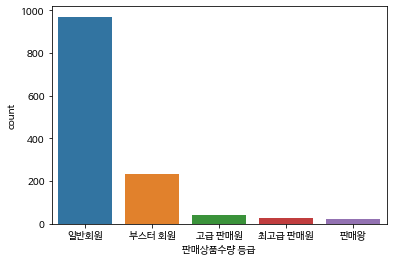

In [ ]:
sns.countplot( df['판매상품수량 등급'])

### 여러상품을 판매중인 고객의 상품 특징 찾기

각 인덱스별로 특징을 파악해야하는데 어떻게 할 수 있을까


In [ ]:
# 분석에 도움되는 컬럼인 units_sold와 rating_count의 값으로 뽑아보면 해당 판매자의 제품의 상황을 요약해서 볼 수 있지않을까?
print(df.iloc[1][['units_sold', 'rating_count']].values)

[20000 6135]


In [ ]:
# 복수개의 상품을 판매하는 고객의 상품 특징 확인을 위한 특징 추출

for i in result: # 고유의 고객id 리스트
  product_list = df[df['merchant_id']==i]['product_id'].values # 상품id 값
  product_index = df[df['merchant_id']==i]['product_id'].index.values # 상품id index
  if len(product_list) >=2: # 고객당 상품이 1대1이면 추가 분석할필요 없기때문에 2개이상으로 필터, 상품의 경우 앞서 중복제거를 했기때문에 이후 출력되는 상품은 모두 다른상품
    for k in product_index: # 상품 index 별로 요약할 수 있는 특징을 뽑기 위한 반복문
      print('[ 고객 id ] :',i,'>>>',df.iloc[k][['units_sold', 'rating_count']].values) # 각 상품의 판매량과 추천수

[ 고객 id ] : 56458aa03a698c35c9050988 >>> [20000 6135]
[ 고객 id ] : 56458aa03a698c35c9050988 >>> [1000 99]
[ 고객 id ] : 56458aa03a698c35c9050988 >>> [100 47]
[ 고객 id ] : 56458aa03a698c35c9050988 >>> [100 7]
[ 고객 id ] : 58cfdefdacb37b556efdff7c >>> [5000 579]
[ 고객 id ] : 58cfdefdacb37b556efdff7c >>> [100 5]
[ 고객 id ] : 58cfdefdacb37b556efdff7c >>> [1000 117]
[ 고객 id ] : 5ab3b592c3911a095ad5dadb >>> [100 20]
[ 고객 id ] : 5ab3b592c3911a095ad5dadb >>> [20000 2191]
[ 고객 id ] : 5ba2251b4315d12ebce873fa >>> [5000 687]
[ 고객 id ] : 5ba2251b4315d12ebce873fa >>> [1000 596]
[ 고객 id ] : 5ba2251b4315d12ebce873fa >>> [10000 2092]
[ 고객 id ] : 5ba2251b4315d12ebce873fa >>> [5000 677]
[ 고객 id ] : 5952a218e81e8a4c30b5bbbc >>> [1000 613]
[ 고객 id ] : 5952a218e81e8a4c30b5bbbc >>> [1000 127]
[ 고객 id ] : 5952a218e81e8a4c30b5bbbc >>> [100 24]
[ 고객 id ] : 566eaa533a698c6442549a74 >>> [1000 121]
[ 고객 id ] : 566eaa533a698c6442549a74 >>> [5000 856]
[ 고객 id ] : 5926c5ace8ff5525241b368d >>> [20000 2457]
[ 고객 id ] : 5926c

한고객이 파는 모든상품이(2개이상) 1000개 이상의 판매량을 기록할 경우 인기 판매회원 으로 정한다.

In [ ]:
for i in result: # result = 중복제거된 고유의 고객id 리스트
  product_list = df[df['merchant_id']==i]['product_id'].values # 상품id 값
  product_index = df[df['merchant_id']==i]['product_id'].index.values # 상품id index 
  if len(product_list) >=2: # 고객당 상품이 1대1이면 추가 분석할필요 없기때문에 2개이상으로 필터, 상품의 경우 앞서 중복제거를 했기때문에 이후 출력되는 상품은 모두 다른상품
    for k in product_index: # 상품 index 별로 요약할 수 있는 특징을 뽑기 위한 반복문
      print(i, ':',df.iloc[k]['units_sold'])

56458aa03a698c35c9050988 : 20000
56458aa03a698c35c9050988 : 1000
56458aa03a698c35c9050988 : 100
56458aa03a698c35c9050988 : 100
58cfdefdacb37b556efdff7c : 5000
58cfdefdacb37b556efdff7c : 100
58cfdefdacb37b556efdff7c : 1000
5ab3b592c3911a095ad5dadb : 100
5ab3b592c3911a095ad5dadb : 20000
5ba2251b4315d12ebce873fa : 5000
5ba2251b4315d12ebce873fa : 1000
5ba2251b4315d12ebce873fa : 10000
5ba2251b4315d12ebce873fa : 5000
5952a218e81e8a4c30b5bbbc : 1000
5952a218e81e8a4c30b5bbbc : 1000
5952a218e81e8a4c30b5bbbc : 100
566eaa533a698c6442549a74 : 1000
566eaa533a698c6442549a74 : 5000
5926c5ace8ff5525241b368d : 20000
5926c5ace8ff5525241b368d : 20000
5926c5ace8ff5525241b368d : 1000
5926c5ace8ff5525241b368d : 10000
5926c5ace8ff5525241b368d : 20000
5926c5ace8ff5525241b368d : 5000
566012f6769a5629aefca555 : 1000
566012f6769a5629aefca555 : 1000
566012f6769a5629aefca555 : 10000
566012f6769a5629aefca555 : 10000
5708773c3c02161b3f8c7900 : 100000
5708773c3c02161b3f8c7900 : 100
5708773c3c02161b3f8c7900 : 1000
570

In [ ]:
# 로직구상할 시간이 부족하여 모든상품이 1000개이상인 고객id저장
customerid = ['5ba2251b4315d12ebce873fa','566eaa533a698c6442549a74','5926c5ace8ff5525241b368d ',
'5926c5ace8ff5525241b368d','566012f6769a5629aefca555','5ae296b6cd968d66be12d247','5cb636dda7173671aedef051',
'5adef3559d5e9767b3177472','5d49403060c79c113a908720','559d33adc605853731afbf10','5e5363458cd99e4035bcd1c8',
'5c51b9b468178729c4213657','5660e53e769a564b3e3aeca0','55e7e41e606d0a18fdfc67d1','580f06685250a20783d33e56',
'5b14d31d7e43f22f255ea98c','5aa1f31308a2240a052e9a1a','583e7f658108913bced6f8cf','5c73a50ba0e25714e7f2bf90',
'5a7b23a69bda4e3d375e7b3f','55c8029641d799421d41fe3a','58a6b5d975b8da57c954c719','556fc80f95528719e004fe8b',
'58c910072be00b51c601ccee','578866243a698c1713f2d19c','557ed5b886d66519ff242099','599bf53b21064f19ffffc891',
'5901f6c2a8e3eb2aca4b5559','583e34bb0299bc7904a92edf','5ae56280ddf45b183333ac45','54af9c1428565a151043b6bf',
'5810bc6d61e38656e04e8ba2','5810c46f02b01e15f8a10e38','58106cfce516491e6e5f1e53','59c8a909ae228e37ae159559',
'576cfeed007b536be4a9ae96','56dce88d21396a16a47eff39','5639cd9bddb94f103070ef9f','58b011e82e27bf506cee1ace',
'5705e40cfda6252c1a9db062','585037af728de662411bd39a','5bd29797d32ed5241007af46','5406c9c77f086e1be430d73e',
'584c23fbef56286074d2c9a6','597767f6171974220c25560a','55542b4b662da7114d591723','53a2a09ad91139519161a267',
'55cc4e1d845591103477a561','5b1522ab7b94e12ee3d455c9','583547f417dc6224cb464117','5829d1ca96db262f04db2063',
'5d464f4a56a26046dd1bb8a4','5495976a40b3782bc8b3654a','55d18ce6183a5d103f970011','53e03f56ff4d6d36d2285ab0',
'5860cf7b0929fc4d76180aed','58216982dd9916453fe2d1a1','576bbb443a698c085103c010','52bd3ddb34067e4620a4c62d',
'53facca81c105e3d5866e212','570d017b1b4ca758e18e407d','569f632ed5f0840dda331a97','55769de4fa0be7249554bce2',
'58c921126c30436b692b1ead','565c13ad389b9b2df29caa32','545c2b1790c776172b72d5ab','5384613a796f680f9d78a127',
'56e43d9e3a698c3826a5feff','57086fd7fa6bee434d0e5852','5831ae002f5e534c0a485f06','556d0dc2c00cd721cce30dd1',
'59c7610621064f2f6c8c9fe7','59aaa4d39fbc514dc80328e3','5c7893301bcc452c015b5de4','5c74e493a0e25750b550e2a1',
'561dc58d1f1ffb54d008b82f','58dceeb2a6d6757401114dfd','5bde9444a53011739fbde291','58b92804935861529969e778',
'5d46d6fd4c78550b43ab8351','58a99ceca65ebc504a6ebf1e','594756ab53ebe27caad41157','59c86bce67e9be6f9da5cb03',
'58d0c52c19bf8b6b34178db0','58481b8e728de666bd5b925f','587f85cbb8038f4cb049c56c','565c293d99558d1ed8ae7fb2',
'53994751796f684b7f2193b5','584bcf7bfef409603f39b619','5ae3d438c1d5187ae0dcea90','5357bcf2bb72c5504882e889',
'5784d339e8aa8938977fefd0','5954b765abea9167c0495382','5788a55ba78e3f2dce4126ff','563c5b3d05398a37780be2e2',
'566a25e33a698c1f131fd872','5800a8bb50d8ab5aaee15f20']

df['인기판매회원'] = 0

for i in customerid:
  for j in df.loc[df['merchant_id']==i].index:
    df.iloc[j,-1] = 1

In [ ]:
df.loc[df['merchant_id']=='584bcf7bfef409603f39b619']['인기판매회원']

798     1
1113    1
Name: 인기판매회원, dtype: int64

In [ ]:
df['인기판매회원'].value_counts()

0    1053
1     239
Name: 인기판매회원, dtype: int64

In [ ]:
for i in [0,1]:
  print(f'인기판매회원이 {i}인 인원수 :',len(df[df['인기판매회원']==i]['merchant_id'].unique()))

인기판매회원이 0인 인원수 : 827
인기판매회원이 1인 인원수 : 96


### product_id, product_url, merchant_id 의 중복값에 대한 분석및 인사이트 정리(새로운 컬럼 추가1)

1. 상품이 같을때 판매자가 같은경우
2. 상품이 같을때 판매자는 다른경우 
3. 판매자가 같은데 상품이 다른경우 이렇게 세가지의 경우의 수에 대해 알아본 결과 

4. 상품중복 221건, 판매자 중복 590 도출 -> 상품중복은 상품url중복과 매칭이 되었고 이는 크롤링과정의 에러로 유추되며 중복값 삭제

5. 이후 판매자 중복 재확인 결과 369개 검출 -> 한사람이 여러상품을 판매중인 경우가 많음을 알게되었고 판매자와 판매 상품의 개수와 index를 조회해보았고  **판매상품수량등급 컬럼을 생성**하여 구분했다

6. 이후 판매자가 판매하는 상품이 여러개일때 모든상품이 1000개이상 판매를 기록했으면 **인기판매회원의 컬럼 생성** 후 1로 지정하였다.

결론 : 새롭게 추가한 두가지 컬럼을 바탕으로 해당 군집별 마케팅 및 서비스전략 도출이 가능하다.

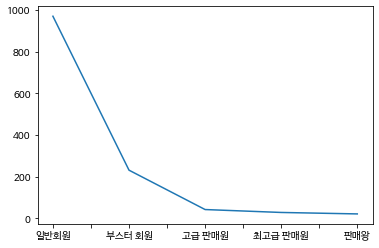

In [ ]:
# 판매상품수량 등급에 따른 상품 수량 (등급별 판매고객 명수랑은 같지않다 -> 상품마다 등급이 붙기때문에 중복갯수 )
df['판매상품수량 등급'].value_counts().plot()

In [ ]:
# # 판매상품수량 등급에 따른 상품 수량 (등급별 판매고객 명수랑은 같지않다 -> 상품마다 등급이 붙기때문에 중복갯수 )
df['판매상품수량 등급'].value_counts()

일반회원       970
부스터 회원     231
고급 판매원      42
최고급 판매원     28
판매왕         21
Name: 판매상품수량 등급, dtype: int64

In [ ]:
# 판매상품수량 등급별 회원수 집계
print('전체 고객 수 :',len(df['merchant_id'].unique()))
print('-'*30)

for i in df['판매상품수량 등급'].unique():
  print(f'{i} 고객 수 :', len(df[df['판매상품수량 등급']==i]['merchant_id'].unique()))

전체 고객 수 : 923
------------------------------
일반회원 고객 수 : 839
부스터 회원 고객 수 : 70
고급 판매원 고객 수 : 8
최고급 판매원 고객 수 : 4
판매왕 고객 수 : 2


In [ ]:
print('전체회원 수', len(df['merchant_id'].unique()))
print('인기판매회원 수 :',len(df[df['인기판매회원']==1]['merchant_id'].unique()),'명')

전체회원 수 923
인기판매회원 수 : 96 명


## 중복값 최종 확인

In [ ]:
# 전체중복값 확인
df.duplicated().sum()

0

## 새로운 컬럼 추가2

In [ ]:
# 새로운 특성추가

# 상품판매 이익 = 가격 * 판매량
df['상품판매이익'] = df['price'] * df['units_sold']

# 수수료 = 상품판매이익 * 10%( 실제 wish 수수료는 다양한 요인에 따라 다르지만 평균을 생각해 보았을때 10%정도가 되었다.)
df['수수료'] = df['상품판매이익']/10

# 순이익  = 상품판매이익 - 수수료
df['순이익'] = df['상품판매이익'] - df['수수료']
df

,title,price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_id,판매상품수량 등급,인기판매회원,상품판매이익,수수료,순이익
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,50,Livraison standard,4,0,34,CN,568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,일반회원,0,1600.0,160.0,1440.0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,50,Livraison standard,2,0,41,CN,17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,부스터 회원,0,160000.0,16000.0,144000.0
2,2020 New Arrival Women Spring and Summer Beach...,8.00,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,1,Livraison standard,3,0,36,CN,295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,5ea10e2c617580260d55310a,일반회원,0,800.0,80.0,720.0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,50,Livraison standard,2,0,41,CN,23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,5cedf17ad1d44c52c59e4aca,부스터 회원,0,40000.0,4000.0,36000.0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,1,Livraison standard,1,0,35,CN,14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,5ebf5819ebac372b070b0e70,일반회원,0,272.0,27.2,244.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,New Summer Fashion Trousers Women Leggings Rip...,3.00,100,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",skyblue,1,Livraison standard,1,0,41,CN,4080,3.987990,584a7a381591451e4e3af3df,0,https://www.wish.com/c/5e8f0165e815903d022a3c7c,5e8f0165e815903d022a3c7c,일반회원,0,300.0,30.0,270.0
1288,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,20000,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",black,50,Livraison standard,2,0,44,CN,16803,4.155032,56455b13b15aab129db58cb7,0,https://www.wish.com/c/5c91a7ae7cfe8e4e64c36d97,5c91a7ae7cfe8e4e64c36d97,부스터 회원,0,160000.0,16000.0,144000.0
1289,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,50,Livraison standard,2,0,41,CN,5316,4.224605,5b507899ab577736508a0782,0,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,5d5fadc99febd9356cbc52ee,부스터 회원,0,60000.0,6000.0,54000.0
1290,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,15,Livraison standard,2,0,11,CN,210,3.961905,5b42da1bf64320209fc8da69,0,https://www.wish.com/c/5e74be96034d613d42b52dfe,5e74be96034d613d42b52dfe,일반회원,0,500.0,50.0,450.0


In [ ]:
print('수수료 상위10% 고객 수: ', len(df[df['수수료'] >= np.quantile(df['수수료'],0.9)]['merchant_id'].unique()),'명')

수수료 상위10% 고객 수:  115 명


In [ ]:
# 수수료 상위 10%고객 리스트
top_customer = df[df['수수료'] >= np.quantile(df['수수료'],0.9)]['merchant_id'].unique()
top_customer

수수료 상위 10% 고객은 우리에게 가장 높은 금액을 가져다 주는 고객이다. 향후, 마케팅 혹은 기획에 중요한 고객이 될 수 있을것이다.

## 고객세그먼트

### 특성선택

In [ ]:
# 전체 특성확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   units_sold                    1292 non-null   int64  
 3   uses_ad_boosts                1292 non-null   int64  
 4   rating                        1292 non-null   float64
 5   rating_count                  1292 non-null   int64  
 6   rating_five_count             1292 non-null   float64
 7   rating_four_count             1292 non-null   float64
 8   rating_three_count            1292 non-null   float64
 9   rating_two_count              1292 non-null   float64
 10  rating_one_count              1292 non-null   float64
 11  badges_count                  1292 non-null   int64  
 12  badge_local_product           1292 non-null   int64  
 13  bad

In [ ]:
# 세그먼트를 위한 특성 선택(우리에게 수익을 많이 가져다 주는 고객 기준)
# 상품판매이익, rating_count
cluster_df = df[['rating_count', '상품판매이익']]
cluster_df

,rating_count,상품판매이익
0,54,1600.0
1,6135,160000.0
2,14,800.0
3,579,40000.0
4,20,272.0
...,...,...
1287,57,300.0
1288,3127,160000.0
1289,1367,60000.0
1290,59,500.0


### 스케일링

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


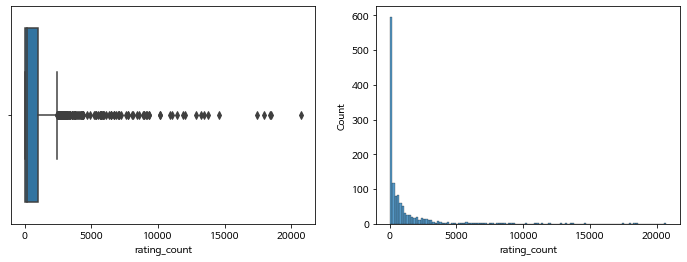

In [ ]:
# 스케일링

# rating_count 스케일링전
fig, ax = plt.subplots(1, 2,figsize = (12,4))
sns.boxplot(cluster_df['rating_count'],ax=ax[0])
sns.histplot(cluster_df['rating_count'], ax= ax[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


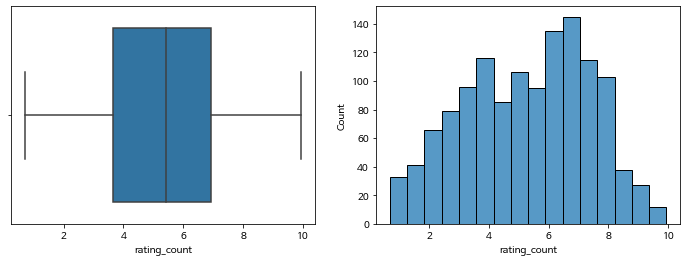

In [ ]:
# rating_count 로그변환
cluster_df['rating_count'] = np.log1p(cluster_df['rating_count'])
fig, ax = plt.subplots(1, 2,figsize = (12,4))
sns.boxplot(cluster_df['rating_count'],ax=ax[0])
sns.histplot(cluster_df['rating_count'], ax= ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


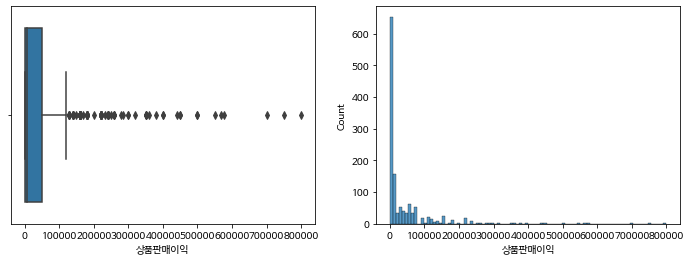

In [ ]:
# 스케일링

# 수수료 스케일링전
fig, ax = plt.subplots(1, 2,figsize = (12,4))
sns.boxplot(cluster_df['상품판매이익'],ax=ax[0])
sns.histplot(cluster_df['상품판매이익'], ax= ax[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


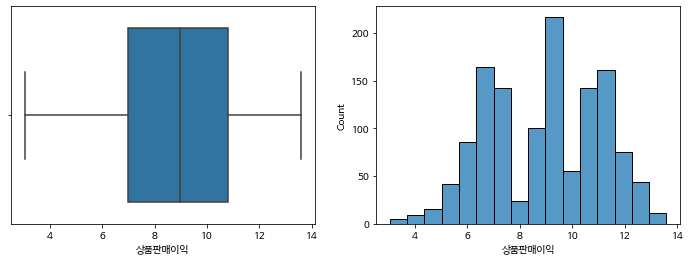

In [ ]:
# 수수료 로그변환
cluster_df['상품판매이익'] = np.log1p(cluster_df['상품판매이익'])
fig, ax = plt.subplots(1, 2,figsize = (12,4))
sns.boxplot(cluster_df['상품판매이익'],ax=ax[0])
sns.histplot(cluster_df['상품판매이익'], ax= ax[1])

In [ ]:
# 데이터프레임 확인
cluster_df

,rating_count,상품판매이익
0,4.007333,7.378384
1,8.721928,11.982935
2,2.708050,6.685861
3,6.363028,10.596660
4,3.044522,5.609472
...,...,...
1287,4.060443,5.707110
1288,8.048149,11.982935
1289,7.221105,11.002117
1290,4.094345,6.216606


### 최적의 클러스터링 개수 구하기

In [ ]:
# 클러스터링
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_df)
    sum_of_squared_distances.append(km.inertia_)

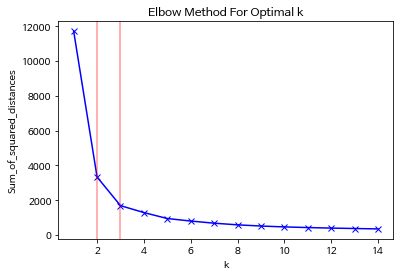

In [ ]:
# Elbow Method 
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [ ]:
# 실루엣 스코어
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(cluster_df)
  clusters = kmeans.predict(cluster_df)

  score = silhouette_score(cluster_df, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.6006227764231294
k : 3 score : 0.5479485019321338
k : 4 score : 0.4826723758781152
k : 5 score : 0.44415021845905417
k : 6 score : 0.4118521114865667
k : 7 score : 0.4060902874155153
k : 8 score : 0.39603426249983137
k : 9 score : 0.38088555613284886
k : 10 score : 0.3876838607928972
k : 11 score : 0.3830188556301946
k : 12 score : 0.3720128745838471
k : 13 score : 0.3493007826858122
best n : 2 best score : 0.6006227764231294


Elbow method 와 실루엣 점수를 통해 최적의 클러스터링 개수는 2개이며 이때 실루엣 점수는 60이 넘는다.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


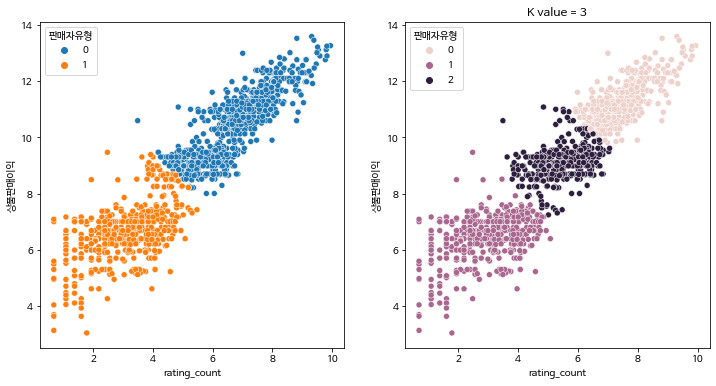

In [ ]:
# 군집 2개와 3개 visualization
from sklearn.cluster import KMeans

cluster_count = [2,3]
fig, ax = plt.subplots(1,2,figsize = (12,6))

for i in cluster_count:
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  kmeans.fit(cluster_df)
  cluster_df['판매자유형'] = kmeans.labels_
  plt.title(f'K value = {i}')
  sns.scatterplot(x = cluster_df['rating_count'],y = cluster_df['상품판매이익'],hue = cluster_df['판매자유형'], ax = ax[i-2]);
  

실루엣 점수와 엘보메소드를 통해 2개 혹은3개중 2개의 군집이 가장 최적이었으나, 고객을 두가지의 극단적인 유형으로 분리하는것은 올바르지 않다고 판단하여 3개의 유형으로 분리할 것이다.(해당부분은 분석가의 경험적인 요소가 많이 작용할 수 있다.)

---

**< 고객 등급별 혜택기획 >**

0번 : 최우수 고객
-> 판매에 대한 수수료만 가자거든 wish의 특성상 최우수 고객은 놓칠수 없다. 따라서 이러한 상품을 사람에게는 다음상품 수수료3%감면과 같은 혜택 부여


2번 : 우수 고객
-> 우수고객 에게는 수수료1.5% 감면 및 상품예측 및 최적화 기능 사용 1회


1번 : 일반 고객
-> 일반고객들이 우수고객으로 넘어 갈 수록 회사에게는 이점이 생기고 상품을 올린 고객과 회사 모두가 win-win하는 방법이다. 따라서 일반고객층에 해당하는 상품들은 상품예측 및 최적화 기능 사용 5회

---

**< 상품예측 및 최적화 기능에 대한설명 >**

상품에 대한 정보를 올리면 해당 상품에 대한 판매 예측 및 최적화를 위한 방법을 알려주는 로직을 만들어 이를 이용하게 해 주어 성공적인 상품 판매를 도와주는 것과 동시에  이를 활용하여 상품예측에 다양한 데이터를 계속 수집한다.

---


In [ ]:
customer = []
for i in cluster_df['판매자유형']:
  if i == 0:
    customer.append('최우수 고객')
  elif i == 2:
    customer.append('우수 고객')
  elif i == 1:
    customer.append('일반 고객')

cluster_df['판매자유형'] = customer
cluster_df['판매자유형'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


array(['일반 고객', '최우수 고객', '우수 고객'], dtype=object)

In [ ]:
cluster_df['판매자유형'].value_counts()

일반 고객     460
최우수 고객    441
우수 고객     391
Name: 판매자유형, dtype: int64

In [ ]:
cluster_df

,rating_count,상품판매이익,판매자유형
0,4.007333,7.378384,일반 고객
1,8.721928,11.982935,최우수 고객
2,2.708050,6.685861,일반 고객
3,6.363028,10.596660,최우수 고객
4,3.044522,5.609472,일반 고객
...,...,...,...
1287,4.060443,5.707110,일반 고객
1288,8.048149,11.982935,최우수 고객
1289,7.221105,11.002117,최우수 고객
1290,4.094345,6.216606,일반 고객


In [ ]:
cluster_df = cluster_df['판매자유형']
Cluster_table = pd.merge(df, cluster_df, left_index =True, right_index = True, how = 'left')
Cluster_table

,title,price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_id,판매상품수량 등급,인기판매회원,상품판매이익,수수료,순이익,판매자유형
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,50,Livraison standard,4,0,34,CN,568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,일반회원,0,1600.0,160.0,1440.0,일반 고객
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,50,Livraison standard,2,0,41,CN,17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,부스터 회원,0,160000.0,16000.0,144000.0,최우수 고객
2,2020 New Arrival Women Spring and Summer Beach...,8.00,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,1,Livraison standard,3,0,36,CN,295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,5ea10e2c617580260d55310a,일반회원,0,800.0,80.0,720.0,일반 고객
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,50,Livraison standard,2,0,41,CN,23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,5cedf17ad1d44c52c59e4aca,부스터 회원,0,40000.0,4000.0,36000.0,최우수 고객
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,1,Livraison standard,1,0,35,CN,14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,5ebf5819ebac372b070b0e70,일반회원,0,272.0,27.2,244.8,일반 고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,New Summer Fashion Trousers Women Leggings Rip...,3.00,100,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",skyblue,1,Livraison standard,1,0,41,CN,4080,3.987990,584a7a381591451e4e3af3df,0,https://www.wish.com/c/5e8f0165e815903d022a3c7c,5e8f0165e815903d022a3c7c,일반회원,0,300.0,30.0,270.0,일반 고객
1288,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,20000,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",black,50,Livraison standard,2,0,44,CN,16803,4.155032,56455b13b15aab129db58cb7,0,https://www.wish.com/c/5c91a7ae7cfe8e4e64c36d97,5c91a7ae7cfe8e4e64c36d97,부스터 회원,0,160000.0,16000.0,144000.0,최우수 고객
1289,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,50,Livraison standard,2,0,41,CN,5316,4.224605,5b507899ab577736508a0782,0,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,5d5fadc99febd9356cbc52ee,부스터 회원,0,60000.0,6000.0,54000.0,최우수 고객
1290,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,15,Livraison standard,2,0,11,CN,210,3.961905,5b42da1bf64320209fc8da69,0,https://www.wish.com/c/5e74be96034d613d42b52dfe,5e74be96034d613d42b52dfe,일반회원,0,500.0,50.0,450.0,일반 고객


In [ ]:
Cluster_table.groupby('판매자유형').mean().sort_values(by='units_sold',ascending=False).style.background_gradient(cmap = 'Blues')

,price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture,인기판매회원,상품판매이익,수수료,순이익
판매자유형,,,,,,,,,,,,,,,,,,,,,,,,,
최우수 고객,8.706531,13108.843537,0.408163,3.873810,2656.024943,1285.349206,523.541950,392.673469,184.473923,269.986395,0.145125,0.020408,0.117914,0.006803,39.501134,2.442177,0.002268,39.759637,51740.990930,4.085478,0.195011,0.331066,107786.281179,10778.628118,97007.653061
우수 고객,8.627212,1453.964194,0.439898,3.799949,313.867008,148.501279,59.465473,44.971867,22.388747,38.539642,0.104859,0.025575,0.071611,0.007673,34.572890,2.427110,0.000000,41.537084,18268.629156,4.045386,0.166240,0.230179,10989.872123,1098.987212,9890.884910
일반 고객,8.191478,115.910870,0.458696,3.741717,29.569565,13.706522,5.617391,4.128261,2.145652,3.971739,0.084783,0.017391,0.041304,0.026087,27.876087,2.306522,0.004348,40.391304,13769.719565,3.988867,0.108696,0.006522,815.330652,81.533065,733.797587


## Raw_df와 another_df 생성

In [ ]:
# 다른각도로 데이터를 보기위한 데이터프레임 복사(기본적인 전처리 동일)
Raw_df = df.copy() # 판매량 회귀
another_df = df.copy() # 성공적인 판매 10,000개 이상

In [ ]:
Raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   units_sold                    1292 non-null   int64  
 3   uses_ad_boosts                1292 non-null   int64  
 4   rating                        1292 non-null   float64
 5   rating_count                  1292 non-null   int64  
 6   rating_five_count             1292 non-null   float64
 7   rating_four_count             1292 non-null   float64
 8   rating_three_count            1292 non-null   float64
 9   rating_two_count              1292 non-null   float64
 10  rating_one_count              1292 non-null   float64
 11  badges_count                  1292 non-null   int64  
 12  badge_local_product           1292 non-null   int64  
 13  bad

In [ ]:
another_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   units_sold                    1292 non-null   int64  
 3   uses_ad_boosts                1292 non-null   int64  
 4   rating                        1292 non-null   float64
 5   rating_count                  1292 non-null   int64  
 6   rating_five_count             1292 non-null   float64
 7   rating_four_count             1292 non-null   float64
 8   rating_three_count            1292 non-null   float64
 9   rating_two_count              1292 non-null   float64
 10  rating_one_count              1292 non-null   float64
 11  badges_count                  1292 non-null   int64  
 12  badge_local_product           1292 non-null   int64  
 13  bad

# 목적에 맞게 컬럼내용 수정

## 판매량(units_sold) 수정

5000개 이상 판매 시 성공적인 판매(successful_sold) : 최소 성공요건으로 하기위함으로 중간에 있는 값으로 설정

In [ ]:
# units_sold 값 확인
df['units_sold'].value_counts()

100       383
1000      357
5000      199
10000     163
20000      99
50         46
10         21
50000      16
100000      6
7           1
2           1
Name: units_sold, dtype: int64

In [ ]:
# successful_sold컬럼으로 변경


sold_list = []
for i in df['units_sold']:
  if i >= 5000: # 5000개 이상 판매시 성공적인 판매
    sold_list.append(1)
  else:
    sold_list.append(0)

df['successful_sold'] = sold_list


#-----------------------------------------------------------------#


# another_df의 successful_sold컬럼으로 변경
sold_list2 = []
for i in another_df['units_sold']:
  if i >= 10000: # 10000개 이상 판매시 성공적인 판매 
    sold_list2.append(1)
  else:
    sold_list2.append(0)

another_df['successful_sold'] = sold_list2

In [ ]:
# df의 판매량 데이터 변경사항 비교(5,000개 이상 성공)
df[['units_sold', 'successful_sold']]

,units_sold,successful_sold
0,100,0
1,20000,1
2,100,0
3,5000,1
4,100,0
...,...,...
1287,100,0
1288,20000,1
1289,10000,1
1290,100,0


In [ ]:
# another_df의 판매량 데이터 변경사항 비교(10,000개 이상성공)
another_df[['units_sold', 'successful_sold']]

,units_sold,successful_sold
0,100,0
1,20000,1
2,100,0
3,5000,0
4,100,0
...,...,...
1287,100,0
1288,20000,1
1289,10000,1
1290,100,0


In [ ]:
# 변경후 기존 units_sold 컬럼 제거
df = df.drop(columns = ['units_sold'])
#-----------------------------------------------------------------#
another_df = another_df.drop(columns = ['units_sold'])

## 배송방법(shipping_option_name)수정

In [ ]:
df['shipping_option_name'].value_counts()

Livraison standard         1238
Standard Shipping            18
Envio Padrão                  7
Expediere Standard            4
Envío normal                  4
Standardowa wysyłka           3
Standardversand               3
الشحن القياسي                 3
Standart Gönderi              2
Стандартная доставка          2
การส่งสินค้ามาตรฐาน           2
Livraison Express             2
Spedizione standard           2
Ekspresowa wysyłka            1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

|배송방법|배송형태|
|-|-|
|Livraison Express | **특급배송**|
|Ekspresowa wysyłka | **특급배송**|
|Livraison standard | 표준배송|
|Standard Shipping | 표준배송|
|Envio Padrão | 표준배송|
|Expediere Standard | 표준배송|
|Envío normal | 표준배송|
|الشحن القياسي | 표준배송|
|Standardversand | 표준배송|
|Standardowa wysyłka | 표준배송|
|Стандартная доставка | 표준배송|
|การส่งสินค้ามาตรฐาน | 표준배송|
|Standart Gönderi | 표준배송|
|Spedizione standard  | 표준배송|
|ការដឹកជញ្ជូនតាមស្តង់ដារ | 표준배송|


In [ ]:
# 배송방법에서 -> 특급배송여부로 컬럼의 속성을 변경

shipping_list = []
special = ['Livraison Express', 'Ekspresowa wysyłka']

for i in df['shipping_option_name']:
  if i in special:
    shipping_list.append(1)
  else:
    shipping_list.append(0)

df['shipping_option_name'] = shipping_list
print(df['shipping_option_name'].value_counts())

#-----------------------------------------------------------------#

shipping_list2 = []
special2 = ['Livraison Express', 'Ekspresowa wysyłka']

for i in another_df['shipping_option_name']:
  if i in special2:
    shipping_list2.append(1)
  else:
    shipping_list2.append(0)

another_df['shipping_option_name'] = shipping_list2
print(another_df['shipping_option_name'].value_counts())

#-----------------------------------------------------------------#

shipping_list3 = []
special3 = ['Livraison Express', 'Ekspresowa wysyłka']

for i in Raw_df['shipping_option_name']:
  if i in special3:
    shipping_list3.append(1)
  else:
    shipping_list3.append(0)

Raw_df['shipping_option_name'] = shipping_list3
print(Raw_df['shipping_option_name'].value_counts())

0    1289
1       3
Name: shipping_option_name, dtype: int64
0    1289
1       3
Name: shipping_option_name, dtype: int64
0    1289
1       3
Name: shipping_option_name, dtype: int64


In [ ]:
# 컬럼명 변경
df.rename(columns = {'shipping_option_name':'quick_shipping'},inplace = True)

#-----------------------------------------------------------------#
another_df.rename(columns = {'shipping_option_name':'quick_shipping'}, inplace = True)

#-----------------------------------------------------------------#
Raw_df.rename(columns = {'shipping_option_name':'quick_shipping'}, inplace = True)


## 배송급행여부(shipping_is_express)수정

In [ ]:
df['shipping_is_express'].value_counts()

0    1289
1       3
Name: shipping_is_express, dtype: int64

In [ ]:
df.loc[df['quick_shipping']==1]

,title,price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_inventory,quick_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_id,판매상품수량 등급,인기판매회원,상품판매이익,수수료,순이익,successful_sold
600,New Sexy Women Strap Backless Pajamas Lingerie...,8.0,0,2.79,14,5.0,1.0,0.0,2.0,6.0,2,1,0,1,"Mini,Dress,summer dress,Mini dress,silk dress,...",brown,50,1,7,1,41,CN,7012,4.336708,587dd9a883eee74e06b30974,0,https://www.wish.com/c/5aabae5e7ddb066f389e4e7b,5aabae5e7ddb066f389e4e7b,일반회원,0,800.0,80.0,720.0,0
678,Summer Women's Fashion Sleeveless V-neck backl...,49.0,0,4.67,6,4.0,2.0,0.0,0.0,0.0,1,0,0,1,"party,Goth,Plus Size,Summer,Dress,V-neck,bodyc...",Rose red,2,1,12,1,41,CN,29977,4.223138,5925555b2cd9447854443c41,0,https://www.wish.com/c/5d09ecc2f5d4eb7721203368,5d09ecc2f5d4eb7721203368,일반회원,0,4900.0,490.0,4410.0,0
925,Sexy Women Camouflage Print Bandage Push-up Sw...,6.0,0,4.29,2808,1789.0,459.0,300.0,110.0,150.0,3,1,1,1,"bathing suit,Fashion,fashion swimsuit,bikini s...",pink,50,1,7,1,39,CN,33675,4.314150,5577b101429aa92940bc33e7,0,https://www.wish.com/c/588c54fb6661e84246a8aa71,588c54fb6661e84246a8aa71,일반회원,0,60000.0,6000.0,54000.0,1


배송급행여부는 배송방법의 특급배송과 같으므로 다중공선성문제가 생기기 때문에 삭제해준다.

In [ ]:
df.drop(columns=['shipping_is_express'],inplace=True)

#-----------------------------------------------------------------#
another_df.drop(columns = ['shipping_is_express'], inplace=True)

#-----------------------------------------------------------------#
Raw_df.drop(columns = ['shipping_is_express'], inplace= True)

## 배송가능한 국가 수 (countries_shipped_to) 수정

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


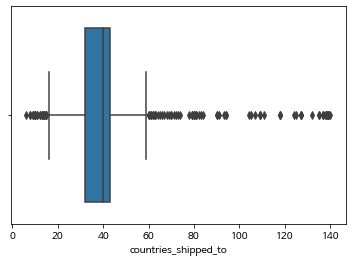

In [ ]:
# boxplot시각화
sns.boxplot(df['countries_shipped_to'])

In [ ]:
print(df['countries_shipped_to'].median())
print(df['countries_shipped_to'].mean())

40.0
40.52244582043344


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


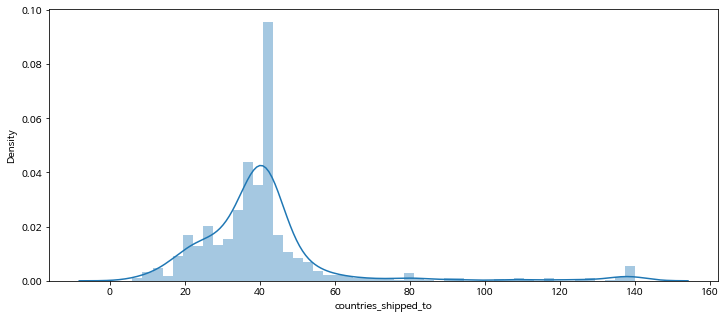

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['countries_shipped_to'])

In [ ]:
pd.DataFrame(df['countries_shipped_to'].value_counts()).head(10)

,countries_shipped_to
41,141
43,138
40,86
38,64
36,56
42,52
35,50
39,36
20,32
37,32


많은 데이터들이 40주변으로 분포되어있음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


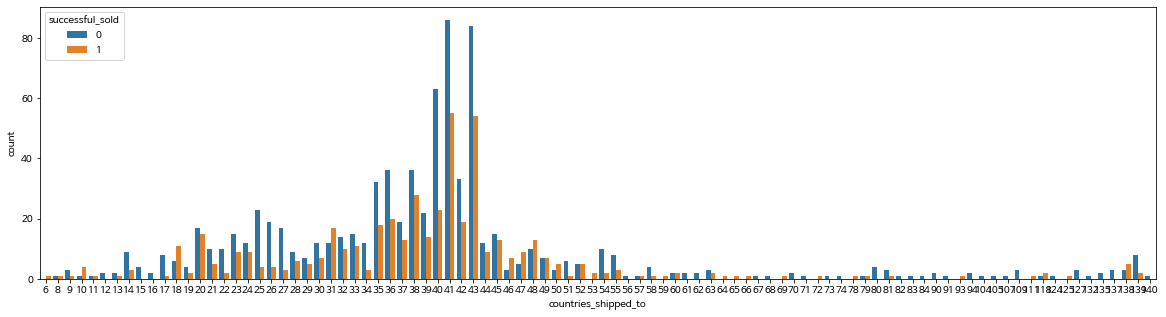

In [ ]:
# df 시각화
plt.figure(figsize=(20,5))
sns.countplot(df['countries_shipped_to'], hue = df['successful_sold'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


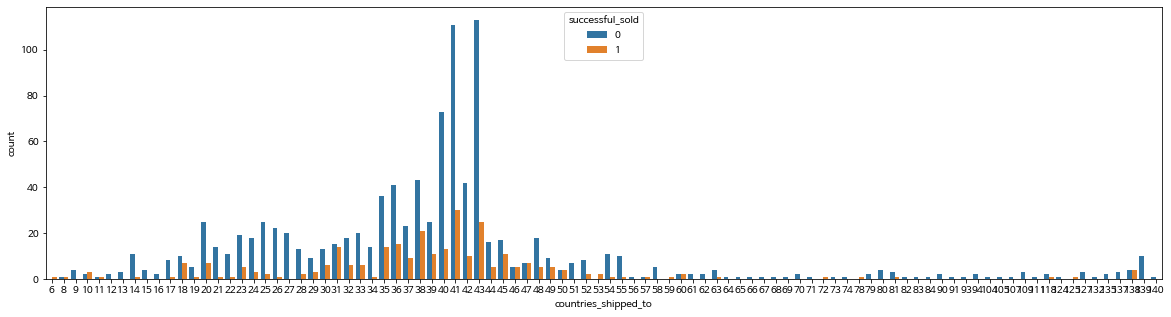

In [ ]:
# another_df 시각화
plt.figure(figsize=(20,5))
sns.countplot(another_df['countries_shipped_to'], hue = another_df['successful_sold'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


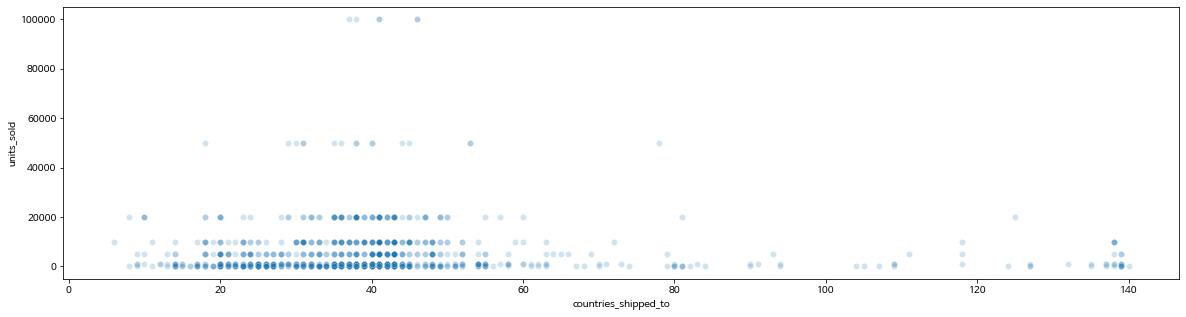

In [ ]:
# Raw_df 시각화
plt.figure(figsize=(20,5))
sns.scatterplot(Raw_df['countries_shipped_to'], Raw_df['units_sold'],  alpha = 0.2)

중간값과 평균값이 비슷한 것으로 나왔으며 실제로 세가지 경우의 데이터프레임을 모두 확인해본 결과 40주변에 가장 많은 데이터가 분포하는 것으로 나타났으며 판매량 또한 40주변이 높은 판매량을 기록한 상품이 많다. 40을 기준으로 오차범위 10개국으로 가정하여 30미만은 범위가 적다, 30~50범위는 적당한 범위, 50초과시 배송범위가 넓다 로 변경해 줄것이다.

In [ ]:
# 30미만 배송범위좁음, 30이상 50미만 평균범위, 50초과 배송범위 넓음

# df
country_list = []

for i in df['countries_shipped_to']:
  if i <30:
    country_list.append(0)
  elif i >= 30 and i <= 50:
    country_list.append(1)
  elif i >50:
    country_list.append(2)

df['countries_shipped_to'] = country_list
print(df['countries_shipped_to'].value_counts())


#-----------------------------------------------------------------#

# another_df
country_list2 = []

for i in another_df['countries_shipped_to']:
  if i <30:
    country_list2.append(0)
  elif i >= 30 and i <= 50:
    country_list2.append(1)
  elif i >50:
    country_list2.append(2)

another_df['countries_shipped_to'] = country_list2
print(another_df['countries_shipped_to'].value_counts())

#-----------------------------------------------------------------#

# Raw_df
country_list3 = []

for i in Raw_df['countries_shipped_to']:
  if i <30:
    country_list3.append(0)
  elif i >= 30 and i <= 50:
    country_list3.append(1)
  elif i >50:
    country_list3.append(2)

Raw_df['countries_shipped_to'] = country_list3
print(Raw_df['countries_shipped_to'].value_counts())

1    886
0    270
2    136
Name: countries_shipped_to, dtype: int64
1    886
0    270
2    136
Name: countries_shipped_to, dtype: int64
1    886
0    270
2    136
Name: countries_shipped_to, dtype: int64


In [ ]:
# 컬럼명 변경
df.rename(columns = {'countries_shipped_to':'shipped_range'}, inplace = True)

#-----------------------------------------------------------------#

another_df.rename(columns = {'countries_shipped_to':'shipped_range'}, inplace = True)

#-----------------------------------------------------------------#

Raw_df.rename(columns = {'countries_shipped_to':'shipped_range'}, inplace = True)

## 원산지(origin_country) 수정

In [ ]:
df['origin_country'].value_counts()

CN    1259
US      27
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [ ]:
df.groupby('origin_country').mean()

,price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,quick_shipping,shipping_option_price,shipped_range,merchant_rating_count,merchant_rating,merchant_has_profile_picture,인기판매회원,상품판매이익,수수료,순이익,successful_sold
origin_country,,,,,,,,,,,,,,,,,,,,,,,,,
CN,8.485306,0.432883,3.805679,1030.762510,497.557585,202.382844,151.934075,71.788721,107.099285,0.111199,0.021446,0.076251,0.013503,33.965052,0.002383,2.389198,0.889595,28715.596505,4.040196,0.159651,0.188245,41070.798729,4107.079873,36963.718856,0.378078
GB,9.000000,1.000000,4.030000,248.000000,127.000000,59.000000,26.000000,15.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1722.000000,3.906504,0.000000,0.000000,9000.000000,900.000000,8100.000000,0.000000
SG,3.380000,1.000000,4.010000,876.000000,369.500000,162.000000,132.000000,73.500000,139.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000,3791.000000,3.918755,0.000000,0.000000,28496.500000,2849.650000,25646.850000,0.500000
US,9.270741,0.444444,3.795556,291.148148,144.333333,56.703704,39.740741,20.148148,30.222222,0.148148,0.000000,0.111111,0.037037,32.518519,0.000000,2.481481,1.259259,4869.148148,4.028261,0.000000,0.074074,15880.444444,1588.044444,14292.400000,0.222222
VE,10.610000,1.000000,3.146667,13.333333,6.666667,1.000000,1.333333,2.000000,2.333333,0.000000,0.000000,0.000000,0.000000,34.333333,0.000000,2.333333,1.000000,391.666667,3.735449,0.000000,0.000000,980.500000,98.050000,882.450000,0.000000


In [ ]:
# 1513개의 데이터중 1474개가 중국이므로 중국과 아닌것으로 변환

origin_list = []

for i in df['origin_country']:
  if i == 'CN':
    origin_list.append(1)
  else:
    origin_list.append(0)

df.rename(columns={'origin_country':'made_in_china'},inplace=True)
df['made_in_china'] = origin_list
print(df['made_in_china'].value_counts())

#-----------------------------------------------------------------#

origin_list2 = []

for i in another_df['origin_country']:
  if i == 'CN':
    origin_list2.append(1)
  else:
    origin_list2.append(0)

another_df.rename(columns={'origin_country':'made_in_china'},inplace=True)
another_df['made_in_china'] = origin_list2
print(another_df['made_in_china'].value_counts())

#-----------------------------------------------------------------#

origin_list3 = []

for i in Raw_df['origin_country']:
  if i == 'CN':
    origin_list3.append(1)
  else:
    origin_list3.append(0)

Raw_df.rename(columns={'origin_country':'made_in_china'},inplace=True)
Raw_df['made_in_china'] = origin_list3
print(Raw_df['made_in_china'].value_counts())

1    1259
0      33
Name: made_in_china, dtype: int64
1    1259
0      33
Name: made_in_china, dtype: int64
1    1259
0      33
Name: made_in_china, dtype: int64


## 평가(rating)수정

In [ ]:
# rating이 너무 다양하게 있어서 소수점 첫째자리 까지 수정
df['rating'] = round(df['rating'],1)

#-----------------------------------------------------------------#
another_df['rating'] = round(another_df['rating'],1)

#-----------------------------------------------------------------#
Raw_df['rating'] = round(Raw_df['rating'],1)

# 가설검정

**가설검정의 경우 기본을 성공적인 판매 5000개 이상 (분류) 데이터프레임인 df를 시작으로 Raw_df(기본 회귀모형의 판매량) 와 another_df(10,000개 이상이 성공적인 판매)를 함께 비교하면서 검정해 나갈것이다.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   int64  
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

In [ ]:
another_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   int64  
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

In [ ]:
Raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   units_sold                    1292 non-null   int64  
 3   uses_ad_boosts                1292 non-null   int64  
 4   rating                        1292 non-null   float64
 5   rating_count                  1292 non-null   int64  
 6   rating_five_count             1292 non-null   float64
 7   rating_four_count             1292 non-null   float64
 8   rating_three_count            1292 non-null   float64
 9   rating_two_count              1292 non-null   float64
 10  rating_one_count              1292 non-null   float64
 11  badges_count                  1292 non-null   int64  
 12  badge_local_product           1292 non-null   int64  
 13  bad

## 가설1. 광고를 넣으면 판매가 더 잘될것이다.

	 성공판매 실패 시 광고 사용 여부에 따른 비율 : 0.83 % 	 성공판매시 광고 사용 여부에 따른 비율 : 0.69 %


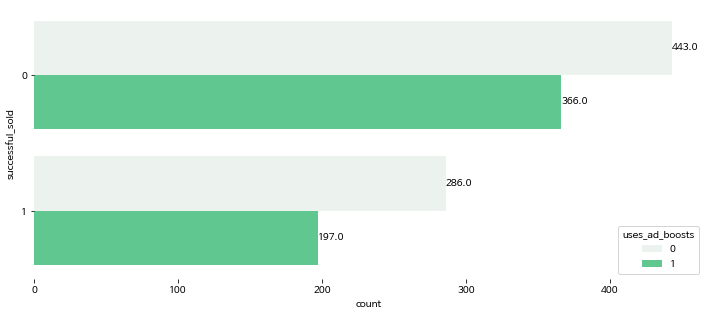

In [ ]:
# df
plt.figure(figsize = (12,5))
ax = sns.countplot(y = df['successful_sold'], hue = df['uses_ad_boosts'], color = pal[0])
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1, y+height/2, (width), va='center')

plt.sca(ax)
plt.box(False)

print('\t','성공판매 실패 시 광고 사용 여부에 따른 비율 :', round(366/443,2),'%','\t','성공판매시 광고 사용 여부에 따른 비율 :', round(197/286,2),'%')

	 성공판매 실패 시 광고 사용 여부에 따른 비율 : 0.79 % 	 성공판매시 광고 사용 여부에 따른 비율 : 0.72 %


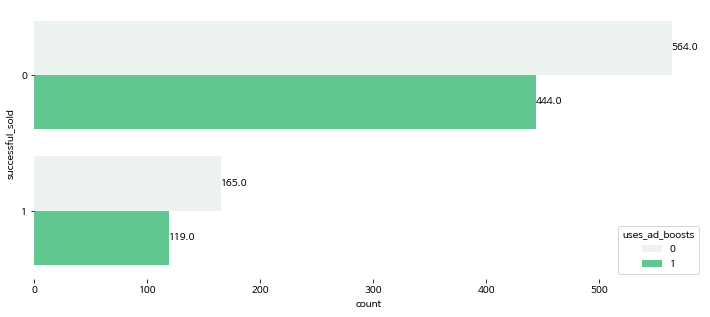

In [ ]:
# another_df
plt.figure(figsize = (12,5))
ax = sns.countplot(y = another_df['successful_sold'], hue = another_df['uses_ad_boosts'], color = pal[0])
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1, y+height/2, (width), va='center')

plt.sca(ax)
plt.box(False)

print('\t','성공판매 실패 시 광고 사용 여부에 따른 비율 :', round(444/564,2),'%','\t','성공판매시 광고 사용 여부에 따른 비율 :', round(119/165,2),'%')

성공판매 기준에 따라 성공판매된 제품의 광고여부에 따른 비율이 다르다, 5000개와 10000개의 기준이 위의 두개의 시각화 자료인데 10000개가 조금더 광고의 효과가 퍼센트 상으로 높아보이며 20000개로 실험을 해보았을때 는 성공판매 제품은 광고했을때 더 많은것을 보였다 이에 혹시 높은 판매량의 제품은 광고를 붙였을때 더 잘팔리는걸까 의문을 가져 50000개를 기준으로 해보았지만 47%로 급락하였다. 따라서 여러번의 실험 결과(쥬피터 상에는 2만개, 5만개에 대한 결과를 남기지는 않았다)광고는 판매량이 높다고 해서 효과를 보는것은 아닌것으로 확인이 되었다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


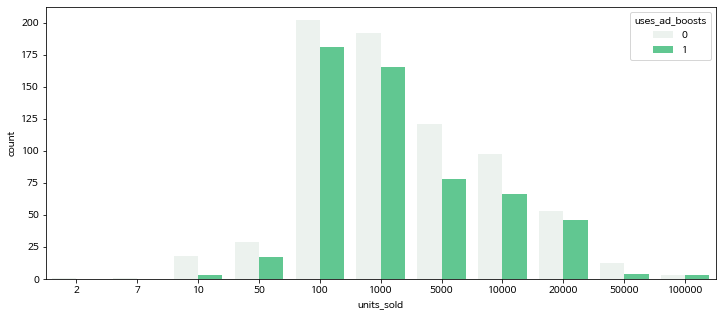

In [ ]:
#Raw_df
plt.figure(figsize = (12,5))
sns.countplot(Raw_df['units_sold'], hue = Raw_df['uses_ad_boosts'], color = pal[0])

회귀의 판매량 원본형태 데이터 역시 광고를 넣었다고해서 성공적인 판매로 이어지는 구간은 찾을 수 없다.

## 가설2. 평가수 가 많을수록 높은 판매량을 기록할 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


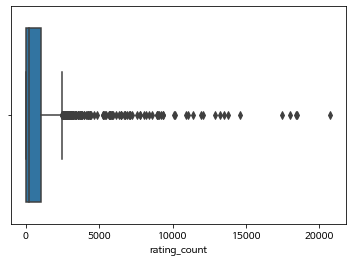

In [ ]:
# 이상치 확인
sns.boxplot(df['rating_count'])

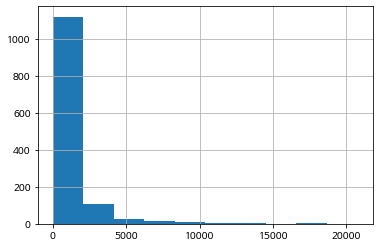

In [ ]:
df['rating_count'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


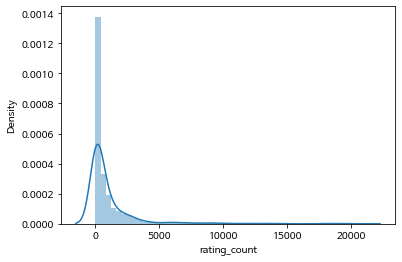

In [ ]:
sns.distplot(df['rating_count'])

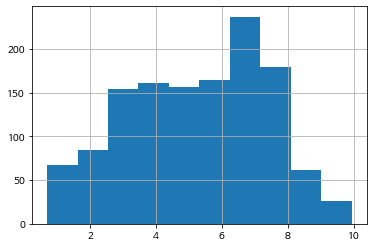

In [ ]:
# df 로그변환
df['rating_count'] = np.log1p(df['rating_count'])

df['rating_count'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


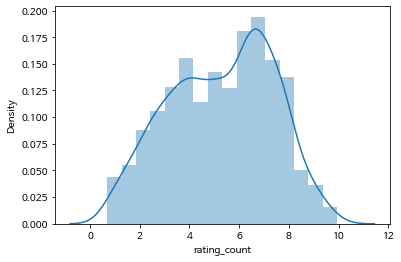

In [ ]:
sns.distplot(df['rating_count'])

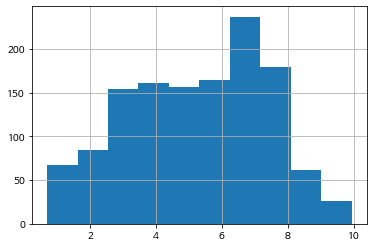

In [ ]:
# another_df 로그변환
another_df['rating_count'] = np.log1p(another_df['rating_count'])
another_df['rating_count'].hist()

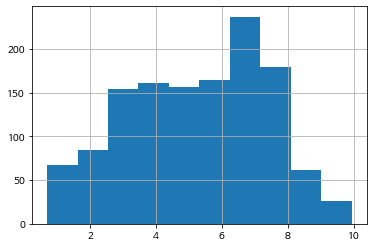

In [ ]:
# Raw_df 로그변환
Raw_df['rating_count'] = np.log1p(Raw_df['rating_count'])
Raw_df['rating_count'].hist()

Text(0.5, 1.0, '<(df)추천수와 성공간의 시각화>')

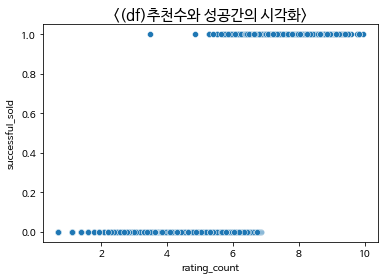

In [ ]:
# df 추천수와 성공간의 시각화
sns.scatterplot(y = df['successful_sold'],x =df['rating_count'])
plt.title('<(df)추천수와 성공간의 시각화>', fontsize=15)

Text(0.5, 1.0, '<(another_df)추천수와 성공간의 시각화>')

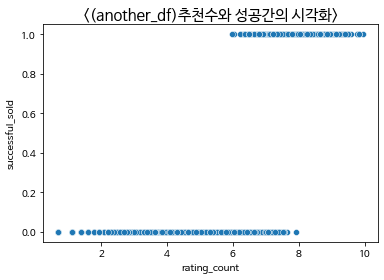

In [ ]:
# another_df 추천수와 성공간의 시각화
sns.scatterplot(y = another_df['successful_sold'],x =another_df['rating_count'])
plt.title('<(another_df)추천수와 성공간의 시각화>', fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


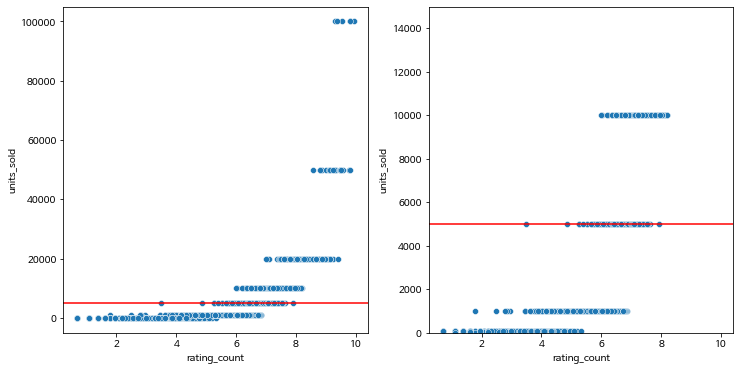

In [ ]:
# Raw_df 추천수와 성공간의 시각화
fig, ax = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(Raw_df['rating_count'], Raw_df['units_sold'],ax = ax[0])
ax[0].axhline( y= 5000, color = 'r')

# 확대
sns.scatterplot(Raw_df['rating_count'], Raw_df['units_sold'],ax=ax[1])
plt.ylim(0,15000)
ax[1].axhline( y= 5000, color = 'r')

rating_count의 경우 자연발생적 이상치 이기때문에 나중에 데이터셋을 분리하여 각각을 정규화 혹은 표준화 해줄것이다. 
데이터셋 분리전 다시 지수화 시킬예정 (이상치가 크기때문에 이에 맞는 정규화 혹은 표준화 방법 사용할것)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


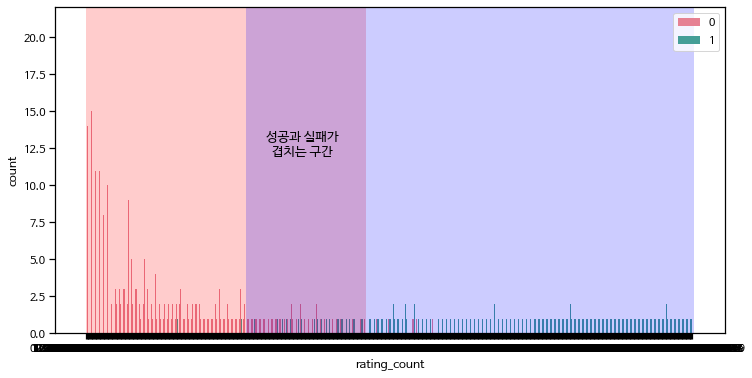

In [ ]:
import matplotlib.patches as patches

plt.figure(figsize =(12, 6))
sns.set_context('notebook')
ax = sns.countplot(df['rating_count'], hue = df['successful_sold'], palette= 'husl')

ax =plt.gca()

ax.axvspan(0, 350, facecolor='red',alpha = 0.2)
ax.axvspan(200, 760, facecolor='blue',alpha = 0.2)
ax.text(225,12,'성공과 실패가 \n  겹치는 구간',fontsize = 13)

ax.legend(loc = 'upper right')
plt.show()

특정 추천수에 도달하면 성공과 실패의 확률이 비슷해지고 이후 성공적으로 판매할 확률이 급격이 증가하게 된다.
즉, 평가수가 많아질 수록 성공적으로 판매할 가능성이 높아진다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


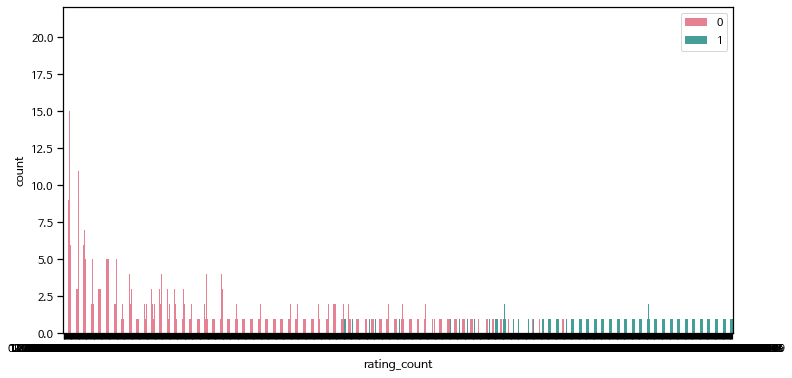

In [ ]:
import matplotlib.patches as patches

plt.figure(figsize =(12, 6))
sns.set_context('notebook')
ax = sns.countplot(another_df['rating_count'], hue = another_df['successful_sold'], palette= 'husl')

ax.legend(loc = 'upper right')
plt.show()

판매량 기준이 높아질 수록 rating_count도 올라가는것을 비교해 볼 수 있다.
즉, 현재까지 rating_count가 판매량과 연관이 있는것다고 볼만하다.

## 가설3. 평가수가 많은 사람들은 뱃지를 가지고 있을것이다. < - > 뱃지를 가지고 있는사람은 평가수가 높을것이다.

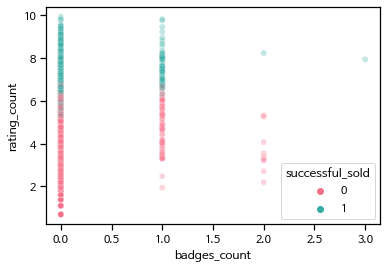

In [ ]:
sns.scatterplot(x = df['badges_count'], y = df['rating_count'], hue = df['successful_sold'],alpha = 0.3, palette = 'husl')

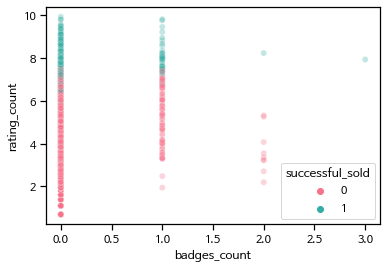

In [ ]:
sns.scatterplot(x = another_df['badges_count'], y = another_df['rating_count'], hue = another_df['successful_sold'], alpha = 0.3, palette = 'husl')

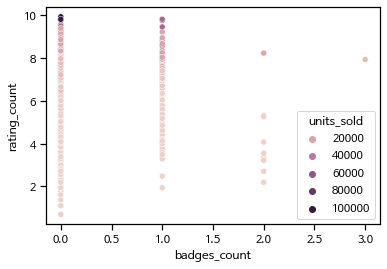

In [ ]:
sns.scatterplot(x = Raw_df['badges_count'],y = Raw_df['rating_count'], hue = Raw_df['units_sold'])

평가수가 많다고 해서 뱃지를 가지고 있을것이라는것은 비례하지않다.

오히려 rating_count에 따라 구분되는 모습이 잘보인다.

( 10만이상의 판매를 기록한 경우는 뱃지가 하나도없는 판매자이다. )

## 가설4. 평점이 높을수록 판매량이 높을 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


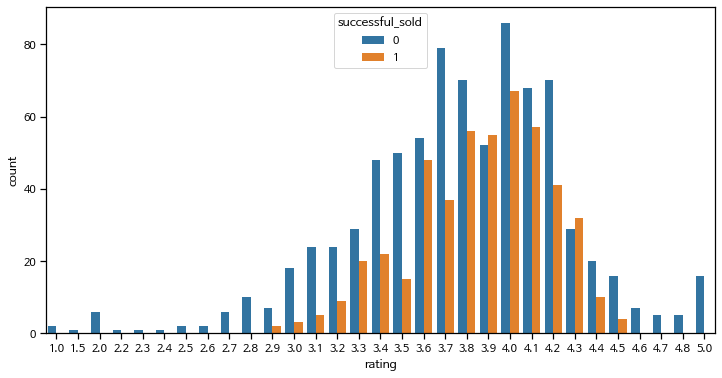

In [ ]:
plt.figure(figsize = (12,6));
sns.countplot(df['rating'], hue = df['successful_sold']);

평점이 무조건 높다고 성공적인 판매를 기록하는것은 아닌것 같다. 그 이유는 무엇일까??

In [ ]:
df[df['rating']==5.0]

,title,price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_inventory,quick_shipping,shipping_option_price,shipped_range,made_in_china,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_id,판매상품수량 등급,인기판매회원,상품판매이익,수수료,순이익,successful_sold
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,0,5.0,0.693147,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,1,0,1,1,1,65,3.507692,5e4b9c3801ba9d210036fc5a,0,https://www.wish.com/c/5ec645bafd107a02279c8c54,5ec645bafd107a02279c8c54,일반회원,0,39.2,3.92,35.28,0
61,Women s New Fashion Solid Color Pants Loose Ca...,5.00,1,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Fashion,pants,widelegpant,Women's Fashi...",khaki,17,0,1,1,1,9,3.666667,5e4b6a0c57cc9b0b53e499a4,0,https://www.wish.com/c/5eba6ecb9a9e129fb97b5dfd,5eba6ecb9a9e129fb97b5dfd,일반회원,0,250.0,25.00,225.00,0
116,Summer Casual Front Knot Cotton Sleeveless Irr...,7.00,0,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Vest,Plus Size,Tank,Tops,V-neck,Fashion...",black,50,0,2,1,1,9703,3.970731,5a9e4f25e05388149703d9c8,0,https://www.wish.com/c/5edf1267c771c4255ceee25d,5edf1267c771c4255ceee25d,일반회원,0,700.0,70.00,630.00,0
123,Ladies Summer Tie Dye Print Short Sleeve Off S...,5.00,0,5.0,0.693147,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Plus Size,Tie Dye,tiedyeprint,Dyes,Dres...",yellow,5,0,2,1,1,4,3.750000,5e6771b33cce5a8dd4f6fd3c,0,https://www.wish.com/c/5ed868776a5a342472182986,5ed868776a5a342472182986,일반회원,0,250.0,25.00,225.00,0
202,Short Sleeve Beach Dress Women Summer Print V ...,8.00,0,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,short sleeve dress,neck dress,Necks,Sle...",yellow,5,0,2,0,1,127,3.874016,5eb51ed929e7865dc268a561,0,https://www.wish.com/c/5ec1e63f7abee20ab93c68f2,5ec1e63f7abee20ab93c68f2,일반회원,0,400.0,40.00,360.00,0
287,Fashion Crop Top for Women Spaghetti Strap V N...,5.00,0,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Plus Size,crop top,clubwear,Tank,Tops,S...",black,13,0,2,1,1,5316,4.224605,5b507899ab577736508a0782,0,https://www.wish.com/c/5ea27636bea0a409031ae82f,5ea27636bea0a409031ae82f,부스터 회원,0,500.0,50.00,450.00,0
292,Summer New Europe and The United States Sexy R...,8.00,0,5.0,2.639057,13.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Flowers,Necks,printed,Pocket,fashion dr...",yellow,50,0,2,1,1,138,3.659420,5d50fb2b1d9a8e23e3334c81,0,https://www.wish.com/c/5ef0ef11f30aba4e22166d4b,5ef0ef11f30aba4e22166d4b,일반회원,0,800.0,80.00,720.00,0
306,Anti-Fog Summer Swimming Full Face Mask Surfac...,14.00,0,5.0,0.693147,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"divingsnorkel,divingmask,Summer,divingequipmen...",pink,5,0,3,1,1,9217,4.173050,569f3031b3d90139e3c5a407,0,https://www.wish.com/c/5e90074a5dd4013b350b81e4,5e90074a5dd4013b350b81e4,일반회원,0,140.0,14.00,126.00,0
345,2020 New Upgrade 170/150/100/30CM Inflatable S...,11.00,0,5.0,1.386294,3.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,children39stoy,Outdoor,summerswimming,s...",blue,3,0,2,1,1,299,4.247492,5d58d3b433f0b4349bbe941f,0,https://www.wish.com/c/5ed3bc0f48c418059f206943,5ed3bc0f48c418059f206943,일반회원,0,1100.0,110.00,990.00,0
702,2020 Summer Men's Classic Shorts Multi-pocket ...,7.00,0,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"joggingpant,Shorts,Casual pants,pants,Summer,O...",grey,2,0,2,0,1,46,3.608696,5e2ecb9deed5087a7ba2f5f7,0,https://www.wish.com/c/5eeef4c4066647a9388a8ac2,5eeef4c4066647a9388a8ac2,일반회원,0,70.0,7.00,63.00,0


평점이 5.0이 나온데이터의 경우 소수의 인원이 5점에 평가함으로서 나오게된 결과값이다.

즉, 평점은 평가 인원수에 따른 영향을 많이 받는다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


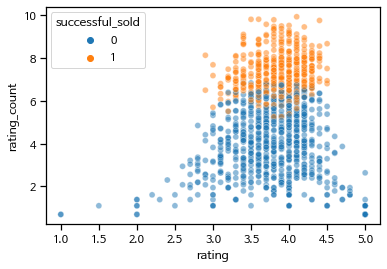

In [ ]:
sns.scatterplot(df['rating'], df['rating_count'],hue = df['successful_sold'] ,alpha =0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


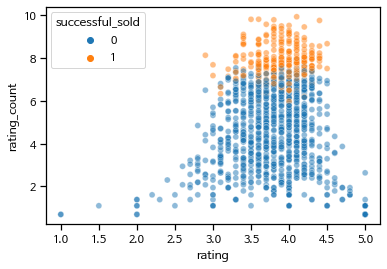

In [ ]:
sns.scatterplot(another_df['rating'], another_df['rating_count'], hue = another_df['successful_sold'], alpha = 0.5)

성공판매의 기준이 좀 더 높아짐에 따라 rating_count의 기준도 올라간것같다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


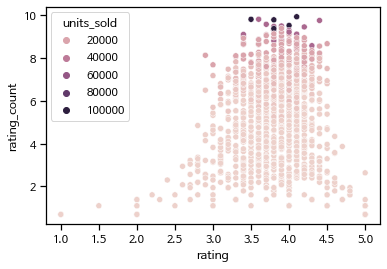

In [ ]:
sns.scatterplot(Raw_df['rating'], Raw_df['rating_count'], hue = Raw_df['units_sold'])

평점이 5점인 것의 총 평가 수를 보면 극히 일부의 고객이 5점을 평가한것으로 정말 소수가 5점을 주어서 평균 평점이 5점으로 나온것으로 확인이 된다. 따라서 평점이 무조건 높다고 판매가 잘되는것은 아니다. 하지만, 평점이 3.0밑으로 떨어지게 되면 성공적인 판매로 이어지지 않는것을 볼 수있다. 

따라서, 평점역시 판매량을 예측하는데 좋은 feature가 되지는 못하지만 인사이트를 고객들에게 전달해줄 수 있는 지표로서는 사용이 가능할것으로 보인다.(ex> 성공판매 요건중 평점은 최소3.0을 넘어야한다 등...)

### 평점, 평가수, 판매량 plotly 시각화

In [ ]:
import plotly.graph_objects as go
line=go.Scatter3d(x=Raw_df['rating'],
                  y=Raw_df['rating_count'],
                  z=Raw_df['units_sold'])
fig=go.Figure(line)
fig.update_layout(title='Impact of rating and rating count to sales',
                  height = 1000,
                  width = 1000,
                  scene = dict(
                  xaxis_title='rating',
                  yaxis_title='rating_count',
                  zaxis_title='units_sold'))
fig.show()

## 가설5. 뱃지가 많을 수록 판매량이 높을 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



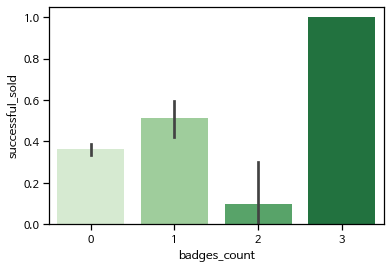

In [ ]:
sns.barplot(df['badges_count'], df['successful_sold'], palette='Greens')

In [ ]:
print('뱃지0개',len(df[df['badges_count']==0]))
print('뱃지1개',len(df[df['badges_count']==1]))
print('뱃지2개',len(df[df['badges_count']==2]))
print('뱃지3개',len(df[df['badges_count']==3]))

뱃지0개 1160
뱃지1개 121
뱃지2개 10
뱃지3개 1


In [ ]:
pd.DataFrame(df.groupby('badges_count')['successful_sold'].sum())

,successful_sold
badges_count,
0,419
1,62
2,1
3,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



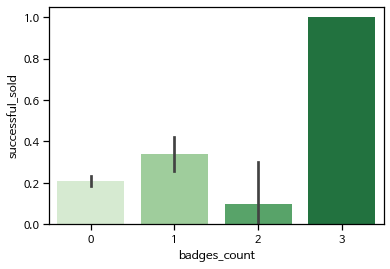

In [ ]:
sns.barplot(another_df['badges_count'], another_df['successful_sold'], palette='Greens')

In [ ]:
print('뱃지0개',len(another_df[another_df['badges_count']==0]))
print('뱃지1개',len(another_df[another_df['badges_count']==1]))
print('뱃지2개',len(another_df[another_df['badges_count']==2]))
print('뱃지3개',len(another_df[another_df['badges_count']==3]))

뱃지0개 1160
뱃지1개 121
뱃지2개 10
뱃지3개 1


10000개이상이 성공일때는 뱃지가 0개, 1개일때 더 성공하기 힘든것으로 보인다.

In [ ]:
pd.DataFrame(another_df.groupby('badges_count')['successful_sold'].sum())

,successful_sold
badges_count,
0,241
1,41
2,1
3,1


5000개 이상일때 뱃지별 성공과, 10000개 이상일때 뱃지별 성공의 수는 차이가있다.

In [ ]:
# 정규성 검정
from scipy import stats

x = df.loc[df['badges_count']==0]['successful_sold']
y = df.loc[df['badges_count']==1]['successful_sold']
z = df.loc[df['badges_count']==2]['successful_sold']

print(stats.ks_2samp(x, y), stats.ks_2samp(x,z), stats.ks_2samp(y, z), sep = '\n')

Ks_2sampResult(statistic=0.15118979766315188, pvalue=0.011808591312832517)
Ks_2sampResult(statistic=0.26120689655172413, pvalue=0.43586613034650057)
Ks_2sampResult(statistic=0.412396694214876, pvalue=0.06101064185235505)


In [ ]:
# 정규성을 만족하지 않을때 아노바 검정
stats.kruskal(x, y, z)

KruskalResult(statistic=13.91318002014446, pvalue=0.0009523385086404081)

집단간의 차이가 존재한다.

In [ ]:
# 사후검정
! pip install scikit_posthocs
import scikit_posthocs as sp
sp.posthoc_conover(df,
                   val_col = 'successful_sold',
                   group_col = 'badges_count',
                   p_adjust = 'holm')

     |████████████████████████████████| 43 kB 1.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37902 sha256=302182491f893bfc3bada22bf69ac70f3e79f48e275a1ac205f5830b6b9eeec9
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


,0,1,2,3
0,1.000000,0.006265,0.300163,0.370336
1,0.006265,1.000000,0.046838,0.370336
2,0.300163,0.046838,1.000000,0.300163
3,0.370336,0.370336,0.300163,1.000000


< 아노바 검정 결과 >

귀무가설 기각 -> 그룹간의 차이는 있을 확률이 높다.

여기서 사실상 3은 1개의 상품에만 있기때문에 비교는 무의미 하다.
따라서 남은것을 정리해보았다.

- 뱃지가 0개 일경우 : 1개인 경우와 그룹간의 차이가 있을 확률이 높다.
- 뱃지가 1개 일경우 : 0개와 2개 모두와 차이가 있을 확률이 높다
- 뱃지가 2개일 경우 1개일 경우 그룹간의 차이가 있을 확률이 높다.

In [ ]:
# 정규성 검정
from scipy import stats

x2 = another_df.loc[another_df['badges_count']==0]['successful_sold']
y2 = another_df.loc[another_df['badges_count']==1]['successful_sold']
z2 = another_df.loc[another_df['badges_count']==2]['successful_sold']

print(stats.ks_2samp(x2, y2), stats.ks_2samp(x2,z2), stats.ks_2samp(y2, z2), sep = '\n')

Ks_2sampResult(statistic=0.1310843545169564, pvalue=0.04186221474843699)
Ks_2sampResult(statistic=0.10775862068965517, pvalue=0.9988819144892578)
Ks_2sampResult(statistic=0.23884297520661157, pvalue=0.5817425331385928)


In [ ]:
stats.kruskal(x2, y2, z2)

KruskalResult(statistic=11.827826032887817, pvalue=0.0027015947925332585)

In [ ]:
! pip install scikit_posthocs
import scikit_posthocs as sp
sp.posthoc_conover(another_df,
                   val_col = 'successful_sold',
                   group_col = 'badges_count',
                   p_adjust = 'holm')

,0,1,2,3
0,1.000000,0.005395,0.410675,0.219941
1,0.005395,1.000000,0.235617,0.235617
2,0.410675,0.235617,1.000000,0.187998
3,0.219941,0.235617,0.187998,1.000000


< another_df 아노바 검정 결과 >
10000개이상이 성공일 때 검정의 결과 0개와 1개를 제외하고는 차이는 같은걸로 나타났다 하지만, 전체가 같지않기때문에 크게 얻을 정보는 없어 보인다.

## 가설6. 인기있는 태그 와 태그분석



In [ ]:
# 각각의 태그 추출
tag_list = []
for tag_dummies in df['tags']:
  tags = str(tag_dummies).split(',')
  for tag in tags:
    tag_list.append(tag)

tag_list

['Summer',
 'Fashion',
 'womenunderwearsuit',
 'printedpajamasset',
 'womencasualshort',
 "Women's Fashion",
 'flamingo',
 'loungewearset',
 'Casual',
 'Shirt',
 'casualsleepwear',
 'Shorts',
 'flamingotshirt',
 'Elastic',
 'Vintage',
 'Tops',
 'tshirtandshortsset',
 'Women',
 'Sleepwear',
 'Print',
 'womenpajamasset',
 'womennightwear',
 'Pajamas',
 'womensleepwearset',
 'Mini',
 'womens dresses',
 'Summer',
 'Patchwork',
 'fashion dress',
 'Dress',
 'Mini dress',
 "Women's Fashion",
 'Women S Clothing',
 'backless',
 'party',
 'summer dresses',
 'sleeveless',
 'sexy',
 'Casual',
 'Summer',
 'cardigan',
 'women beachwear',
 'chiffon',
 'Sexy women',
 'Coat',
 'summercardigan',
 'openfront',
 'short sleeves',
 'Swimsuit',
 "Women's Fashion",
 'leaf',
 'Green',
 'printed',
 'Spring',
 'longcardigan',
 'Women',
 'Beach',
 'kimono',
 'Summer',
 'Shorts',
 'Cotton',
 'Cotton T Shirt',
 'Sleeve',
 'printedletterstop',
 'Clothing',
 'Tops',
 'Necks',
 'short sleeves',
 "Women's Fashion",
 'W

In [ ]:
# 태그 빈도수 집계
from collections import Counter
tag_counts = Counter(tag_list)

# 빈도수 기준으로 50개 추출
tag_counts.most_common(50)

[("Women's Fashion", 1090),
 ('Summer', 1063),
 ('Fashion', 901),
 ('Women', 802),
 ('Casual', 738),
 ('Plus Size', 524),
 ('sleeveless', 471),
 ('Dress', 446),
 ('Shorts', 445),
 ('Tops', 426),
 ('sexy', 279),
 ('Beach', 270),
 ('Sleeve', 244),
 ('short sleeves', 241),
 ('Shirt', 238),
 ('Print', 238),
 ('Tank', 220),
 ('T Shirts', 203),
 ('V-neck', 198),
 ('printed', 197),
 ('Necks', 196),
 ('tank top', 189),
 ('Cotton', 186),
 ('summer dress', 175),
 ('Ladies', 173),
 ('blouse', 166),
 ('pants', 157),
 ('Vest', 154),
 ('Loose', 152),
 ('Floral', 148),
 ('beach dress', 147),
 ('Lace', 144),
 ('women dress', 140),
 ('Mini dress', 138),
 ('slim', 135),
 ('Mini', 128),
 ('Sleeveless dress', 127),
 ('Women Fashion', 122),
 ('party', 118),
 ('casual dress', 113),
 ('Waist', 110),
 ('Party Dress', 109),
 ('long dress', 106),
 ('Round neck', 106),
 ('Spaghetti', 95),
 ('Floral print', 91),
 ('backless', 88),
 ('Slim Fit', 88),
 ('Sport', 85),
 ('jumpsuit', 82)]

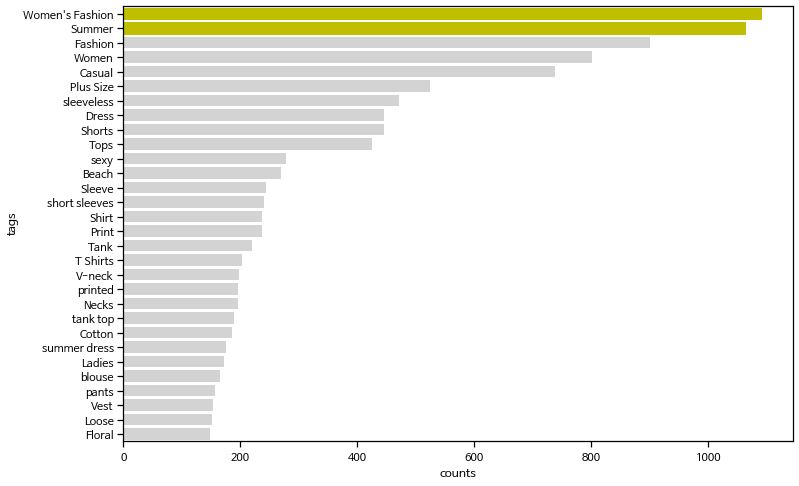

In [ ]:
# 가장 빈도가 높은 단어 순서로 시각화
tag_counts_df = pd.DataFrame(tag_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df,color = 'lightgray')
for i in [0,1]:
  ax.patches[i].set_facecolor('y')
  ax.patches[i].set_edgecolor('y')
plt.show()

(-0.5, 799.5, 399.5, -0.5)

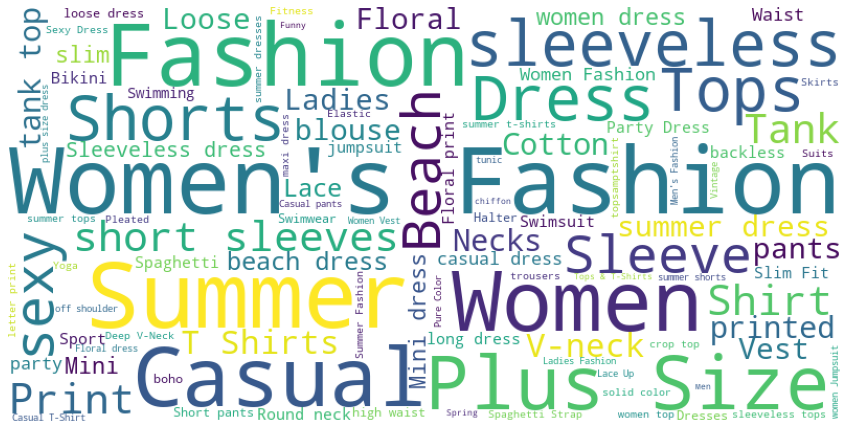

In [ ]:
# wordclud를 통한 단어 빈도에따른 시각화
from wordcloud import WordCloud
import platform

wordcloud = WordCloud(background_color = 'white',
                       max_words = 100,
                       relative_scaling =0.3,
                       width = 800,
                       height = 400).generate_from_frequencies(tag_counts)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

Wonmen's Fashion과 Summer가 가장많이 사용되는 태그이며, 가장 빈번하게 나오는 태그인 이 두개(Women's Fashion, Summer)는 삭제한다. 그 이유는 필요한 상품을 태그 검색을 통하여 찾게되는데 무분별한 태그의 사용으로 인한 노이즈로 작용할 수 있기 때문이다.

또한 Fashion과  women역시 빈번하고 지워야하지 않는가? 라는 의문이 생길 수 있지만, Fashion의 경우 다른 태그와 함께 사용하기 좋은 태그이다 예를 들어 # Sexy # Fashion 혹은 # Cuty # Fashion 등이 예시이다. 그리고 Women또한 이 쇼핑몰이 여성쇼핑몰이지만 남성의 물건을 판매하기 때문에 구분을 위해서 사용할 수 있으면 Fashion과 마찬가지의 중복되는 이유또한 있기 때문이다.

## 가설7. 시즌이 여름이기 때문에 밝은 색의 상품이 판매량이 높을 것이다.

In [ ]:
# 색상에 따른 성공판매량 조회
df.groupby('product_color')['successful_sold'].mean().sort_values(ascending = False).head(60)

product_color
black & stripe      1.000000
Blue                1.000000
navyblue & white    1.000000
navy blue           1.000000
army green          1.000000
lightkhaki          1.000000
blue & pink         1.000000
light green         1.000000
rosegold            1.000000
burgundy            1.000000
denimblue           1.000000
star                1.000000
nude                1.000000
watermelonred       1.000000
gold                1.000000
jasper              1.000000
ivory               1.000000
white & red         1.000000
wine red            1.000000
whitestripe         1.000000
floral              0.800000
black & white       0.666667
lightpink           0.666667
White               0.666667
white & black       0.666667
camouflage          0.666667
khaki               0.500000
black & yellow      0.500000
coolblack           0.500000
lightyellow         0.500000
multicolor          0.500000
dustypink           0.500000
skyblue             0.500000
black & blue        0.500000


위의 자료는 색상에 해당하는 상품의 갯수에 영향을 받으므로 충분한 지표가 되지 못한다.

In [ ]:
# 색상별 집계
color = Counter(df['product_color'])
color

Counter({'Army green': 1,
         'Black': 3,
         'Blue': 1,
         'Pink': 2,
         'RED': 1,
         'Rose red': 1,
         'White': 3,
         'applegreen': 1,
         'apricot': 2,
         'army': 1,
         'army green': 1,
         'armygreen': 23,
         'beige': 14,
         'black': 264,
         'black & blue': 2,
         'black & green': 3,
         'black & stripe': 1,
         'black & white': 3,
         'black & yellow': 2,
         'blackwhite': 1,
         'blue': 83,
         'blue & pink': 1,
         'brown': 6,
         'brown & yellow': 1,
         'burgundy': 2,
         'camel': 1,
         'camouflage': 3,
         'claret': 1,
         'coffee': 5,
         'coolblack': 2,
         'coralred': 1,
         'darkblue': 5,
         'denimblue': 1,
         'dustypink': 2,
         'floral': 5,
         'fluorescentgreen': 2,
         'gold': 1,
         'gray': 9,
         'gray & white': 1,
         'green': 75,
         'grey': 64,
         

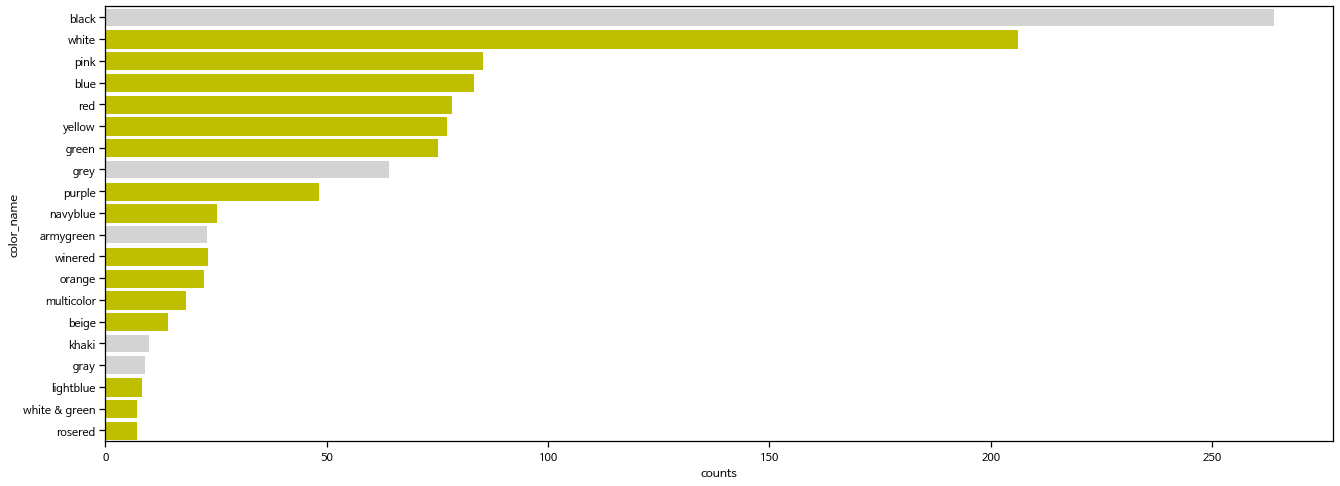

In [ ]:
# 가장 많이 가지고 있는 제품의 색상 20가지 시각화

tag_counts_df = pd.DataFrame(color.most_common(20))
tag_counts_df.columns = ['color_name', 'counts']

sns.set_context('notebook')
plt.figure(figsize = (22,8))
ax=sns.barplot(y = 'color_name', x = 'counts', data = tag_counts_df, color="lightgray")

# 밝은 색깔 차트 색상 넣기
for i in [1,2,3,4,5,6,8,9,11,12,13,14,17,18,19]:
  ax.patches[i].set_facecolor('y')
  ax.patches[i].set_edgecolor('y')
plt.show()

가장 많은 색상 20가지를 뽑은 이유는 정말 적은 수량의 상품을 판매했을경우 수치적으로 해석의 오류를 저지르기 때문이다. 하지만 top20에서도 소량이 많기 때문에 50개 이상만 선별하고자 한다.

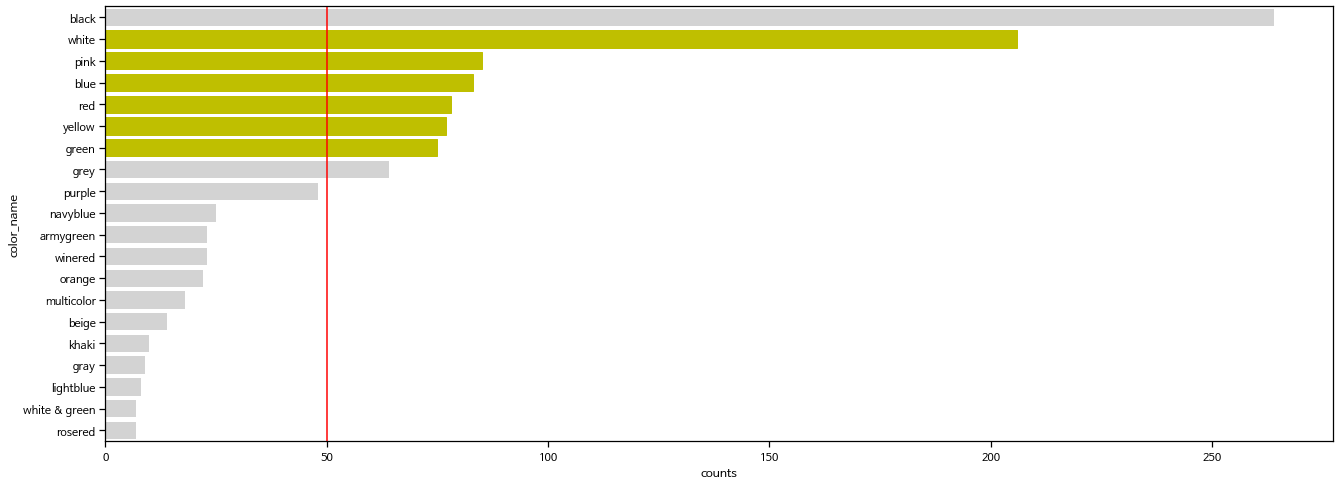

In [ ]:
# 가장 많이 가지고 있는 제품의 색상 20가지 시각화

tag_counts_df = pd.DataFrame(color.most_common(20))
tag_counts_df.columns = ['color_name', 'counts']

sns.set_context('notebook')
plt.figure(figsize = (22,8))
ax=sns.barplot(y = 'color_name', x = 'counts', data = tag_counts_df, color="lightgray")

for i in [1,2,3,4,5,6]:
  ax.patches[i].set_facecolor('y')
  ax.patches[i].set_edgecolor('y')

# 50개이상 제품 구분선
ax.axvline(50,color='r')
plt.show()

In [ ]:
# 가장많은 색상별 판매비율
top_color = ['black', 'white', 'pink', 'blue', 'red', 'yellow','green', 'grey']
for i in top_color:
  print(i,':',int(round(df[df['product_color']==i]['successful_sold'].mean(),2)*100),'%')

black : 42 %
white : 42 %
pink : 32 %
blue : 35 %
red : 33 %
yellow : 19 %
green : 32 %
grey : 44 %


grey -> white, black -> blue -> red-> pink-> green->yellow순서이다. 무조건 밝은 상품이라고 무조건 잘 팔리는것은 아니지만 밝은 색상이 상위권에 많이 분포되어 있다고는 볼 수 있다. 또한, 검은색 옷이 가장 많으며 성공판매 또한 높지만 이는 계절의 영향이 아니기때문에 다른옷 또한 여름이라고 해서 나타나는 특별한 지표인지는 확신할 수 없고 다른계절에 대한 데이터도 필요해 보인다.

## 가설8. 배송비가 판매량에 영향을 미칠 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



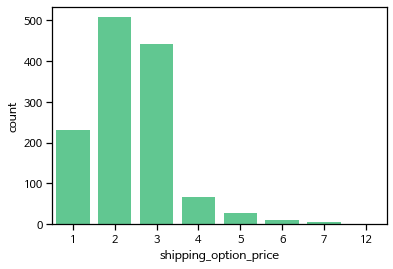

In [ ]:
# df
sns.countplot(df['shipping_option_price'],color = pal[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



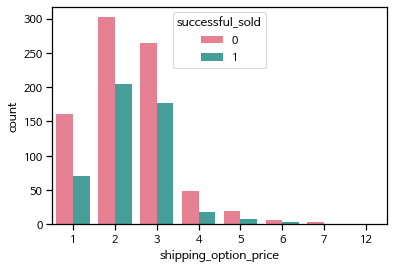

In [ ]:
# df
sns.countplot(df['shipping_option_price'],hue = df['successful_sold'],palette='husl')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



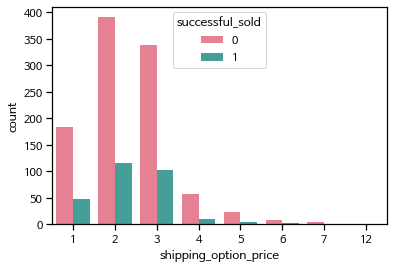

In [ ]:
# another_df
sns.countplot(another_df['shipping_option_price'],hue = another_df['successful_sold'],palette='husl')

In [ ]:
  df['shipping_option_price'].value_counts()

2     507
3     442
1     232
4      67
5      28
6      10
7       5
12      1
Name: shipping_option_price, dtype: int64

In [ ]:
df.groupby('shipping_option_price')['successful_sold'].mean().sort_values(ascending = False)

shipping_option_price
2     0.404339
3     0.400452
1     0.306034
6     0.300000
5     0.285714
4     0.268657
7     0.200000
12    0.000000
Name: successful_sold, dtype: float64

In [ ]:
df[df['shipping_option_price']==3]['successful_sold']

2       0
7       0
15      0
18      1
20      1
       ..
1275    0
1278    1
1279    0
1281    1
1282    1
Name: successful_sold, Length: 442, dtype: int64

배송비용별로 갯수가 다르기때문에 차이가 유의미한지 확인을 하기위해 아노바 검정 실시

In [ ]:
# 정규성 검정
from scipy import stats

a = df[df['shipping_option_price']==1]['successful_sold']
b = df[df['shipping_option_price']==2]['successful_sold']
c = df[df['shipping_option_price']==3]['successful_sold']
d = df[df['shipping_option_price']==4]['successful_sold']
e = df[df['shipping_option_price']==5]['successful_sold']
f = df[df['shipping_option_price']==6]['successful_sold']
g = df[df['shipping_option_price']==7]['successful_sold']
h = df[df['shipping_option_price']==12]['successful_sold']


print(stats.ks_2samp(a, b)[1], stats.ks_2samp(a, c)[1], stats.ks_2samp(a, d)[1], stats.ks_2samp(a, e)[1],stats.ks_2samp(a, f)[1],
      stats.ks_2samp(a, g)[1], stats.ks_2samp(a, h)[1],stats.ks_2samp(a, h)[1],stats.ks_2samp(b, c)[1],stats.ks_2samp(b, d)[1],
      stats.ks_2samp(b, e)[1],stats.ks_2samp(b, f)[1],stats.ks_2samp(b, g)[1],stats.ks_2samp(b, h)[1],stats.ks_2samp(c, d)[1],stats.ks_2samp(c, e)[1],
      stats.ks_2samp(c, f)[1],stats.ks_2samp(c, g)[1],stats.ks_2samp(c, h)[1],stats.ks_2samp(d, e)[1],stats.ks_2samp(d, f)[1],
      stats.ks_2samp(d, g)[1],stats.ks_2samp(d, h)[1],stats.ks_2samp(e, f)[1],stats.ks_2samp(e, g)[1],stats.ks_2samp(e, h)[1],
      stats.ks_2samp(f, g)[1],stats.ks_2samp(f, h)[1],stats.ks_2samp(g, h)[1],sep = '\n')

0.08487578498979498
0.12246331538754207
0.9999949806319294
1.0
1
0.9999999819155622
1
1
1.0
0.20455522562876893
0.8050330465370333
0.9993311169553041
0.9561324150218331
1
0.24033077640701705
0.8380954474097909
0.999664657797618
0.9624571255467042
1
1
1
1
1
1
1
1
1
1
1


귀무가설 채택 -> 모두가 정규성을 나타내고 있다.

In [ ]:
# 등분산검정
stats.levene(a, b, c, d, e, f, g, h)

LeveneResult(statistic=1.9339277430523083, pvalue=0.06097351002511399)

귀무가설 채택 -> 등분산 만족

In [ ]:
# 등분산이 가정된 분산분석
stats.f_oneway(a, b, c, d, e, f, g, h)

F_onewayResult(statistic=1.9339277430523072, pvalue=0.06097351002511399)

귀무가설이 채택이 될 가능성이 높아 평균의 차이는 없을 가능성이 높다.(0.05 기준 이지만 p값이 0.06이기때문에 다른 경험적 요소 혹은 다른수단으로 검정도 해보면 좋을것같다.)

In [ ]:
# 시각화에서 유사해 보이는 b와 c의 평균의 차이를 t검정으로 비교
stats.ttest_ind(b, c)

Ttest_indResult(statistic=0.12166291374406095, pvalue=0.9031917960916641)

b, c는 귀무가설이 채택되어 두 집단 b와 c의 평균의 차이는 없을 가능성이 높다.

In [ ]:
# 다중비교
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = df['successful_sold'],
                     groups = df['shipping_option_price'] )
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0983 0.1685 -0.0179 0.2145  False
     1      3   0.0944 0.2361 -0.0244 0.2132  False
     1      4  -0.0374    0.9 -0.2407 0.1659  False
     1      5  -0.0203    0.9 -0.3135 0.2729  False
     1      6   -0.006    0.9 -0.4794 0.4673  False
     1      7   -0.106    0.9 -0.7685 0.5565  False
     1     12   -0.306    0.9 -1.7749 1.1628  False
     2      3  -0.0039    0.9 -0.0993 0.0915  False
     2      4  -0.1357 0.3773 -0.3262 0.0548  False
     2      5  -0.1186    0.9 -0.4032 0.1659  False
     2      6  -0.1043    0.9 -0.5724 0.3637  False
     2      7  -0.2043    0.9  -0.863 0.4544  False
     2     12  -0.4043    0.9 -1.8715 1.0628  False
     3      4  -0.1318 0.4297  -0.324 0.0604  False
     3      5  -0.1147    0.9 -0.4004 0.1709  False
     3      6  -0.1005    0.9 -0.5692 0.3683  False
     3      

귀무가설 채택 -> 통계적으로 유의하지 않음...(대립가설 기각) -> 사후검정 할 필요가 없다.

meandiff = group2 - group1

p-adj = P-value

reject = 귀무가설기각 : True, 채택 : False

귀무가설 채택(기각되지 않을 가능성이 높다) : 평균의 차이는 같을 가능성이 높다 따라서 배달비용에 따른 판매량의 차이는 없을 가능성이 높다

배송비는 판매량에 영향을 미치지 않는다.

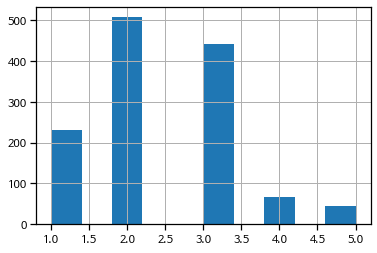

In [ ]:
# 배송금액 범위가 넓어서 줄이는 과정
list =[]
for i in df['shipping_option_price']:
  if i >= 5:
    list.append(5)
  else:
    list.append(i)

df['shipping_option_price'] = list
df['shipping_option_price'].hist()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



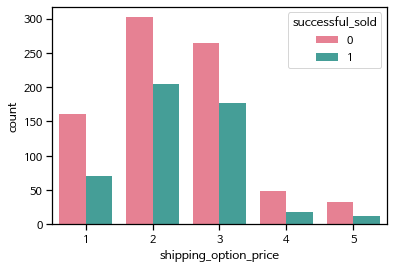

In [ ]:
sns.countplot(df['shipping_option_price'],hue= df['successful_sold'],palette='husl')

## 가설9.	빠른 배송 상품이 판매량에 영향을 미칠것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



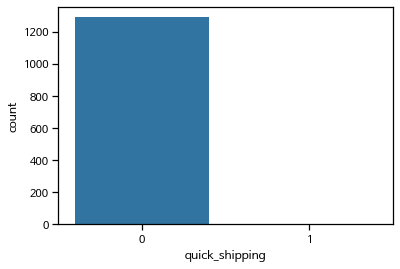

In [ ]:
sns.countplot(df['quick_shipping'])

In [ ]:
df['quick_shipping'].value_counts()       

0    1289
1       3
Name: quick_shipping, dtype: int64

In [ ]:
df[df['quick_shipping']==1]['successful_sold'].value_counts()

0    2
1    1
Name: successful_sold, dtype: int64

In [ ]:
df[df['quick_shipping']==0]['successful_sold'].value_counts()

0    807
1    482
Name: successful_sold, dtype: int64

빠른배송에 대한 뱃지가 있다고 해서 성공적인 판매랑 바로 직결되는것은 해당데이터로는 그렇다 라고 판단할 수 없을것 같다.


## 가설10. 판매자의 평가가 좋을수록 판매량이 높을 것이다.

In [ ]:
df['merchant_rating'] = round(df['merchant_rating'],1)
df['merchant_rating']

0       4.1
1       3.9
2       4.0
3       4.0
4       4.0
       ... 
1287    4.0
1288    4.2
1289    4.2
1290    4.0
1291    4.2
Name: merchant_rating, Length: 1292, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



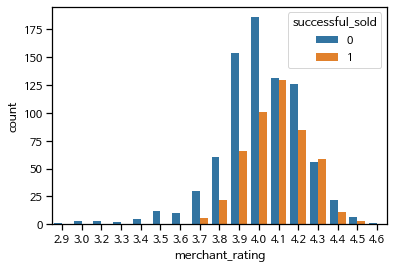

In [ ]:
sns.countplot(df['merchant_rating'],hue=df['successful_sold'])

매우높거나 낮은 rating의 경우 그 수가 너무작아서 merchant_rating이 높다고 해서 무조건 성공적으로 팔린다고 할 수 는 없다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



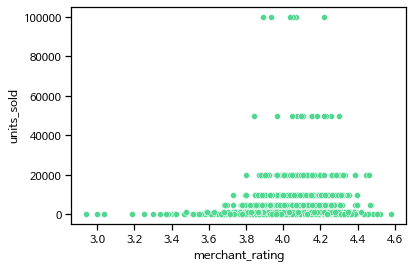

In [ ]:
sns.scatterplot(Raw_df['merchant_rating'], Raw_df['units_sold'], color =pal[0])

In [ ]:
df['merchant_rating'].unique()

array([4.1, 3.9, 4. , 3.5, 3.7, 3.8, 4.3, 4.2, 4.4, 3.3, 4.5, 3.2, 3.6,
       3.4, 3. , 2.9, 4.6])

In [ ]:
list = []
for i in df['merchant_rating']:
  if i not in list:
    list.append(i)

list

[4.1,
 3.9,
 4.0,
 3.5,
 3.7,
 3.8,
 4.3,
 4.2,
 4.4,
 3.3,
 4.5,
 3.2,
 3.6,
 3.4,
 3.0,
 2.9,
 4.6]

In [ ]:
list = sorted(list)
for i in list:
  print(i,':',round(df[df['merchant_rating']==i]['successful_sold'].mean(),2))

2.9 : 0.0
3.0 : 0.0
3.2 : 0.0
3.3 : 0.0
3.4 : 0.0
3.5 : 0.0
3.6 : 0.0
3.7 : 0.17
3.8 : 0.27
3.9 : 0.3
4.0 : 0.35
4.1 : 0.5
4.2 : 0.4
4.3 : 0.51
4.4 : 0.33
4.5 : 0.3
4.6 : 0.0


판매자의 평가가 좋다고 무조건 잘팔리는것은 아니지만 상품 평점과 마찬가지로 일정평점(3.75부근)밑으로는 판매량에 마이너스 요소가 되는것으로 보인다.


판매자의 평가와 평가갯수에 따른 성공과의 상관관계 살펴보기

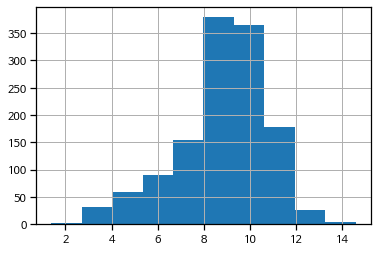

In [ ]:
df['merchant_rating_count'] = np.log1p(df['merchant_rating_count'])
df['merchant_rating_count'].hist()

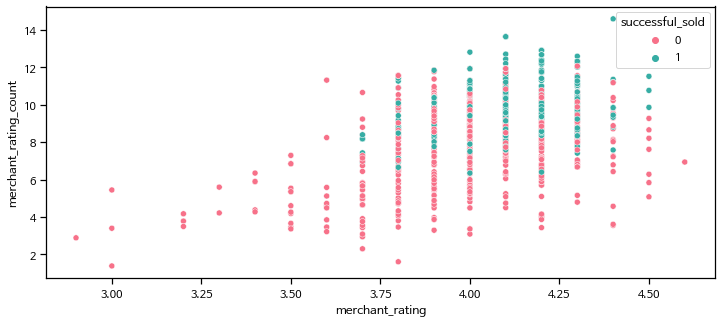

In [ ]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df , x = 'merchant_rating', y = 'merchant_rating_count', hue = 'successful_sold',palette = 'husl')

적어도 평점이 3.5는 넘으면 rating_count가 6이상일때 성공할 확률이 생긴다.

## 가설 11.	판매자의 프로필사진이 판매량을 높이는 한 요소일 것이다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   float64
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



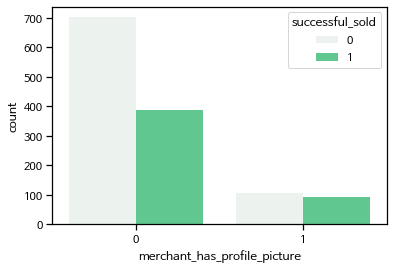

In [ ]:
sns.countplot(df['merchant_has_profile_picture'], hue = df['successful_sold'],color = pal[0])

In [ ]:
df['merchant_has_profile_picture'].value_counts()

0    1091
1     201
Name: merchant_has_profile_picture, dtype: int64

In [ ]:
print('프로필 없을때 성공판매비율',':',df[df['merchant_has_profile_picture']==0]['successful_sold'].mean())
print('프로필 있을때 성공판매비율',':',df[df['merchant_has_profile_picture']==1]['successful_sold'].mean())

프로필 없을때 성공판매비율 : 0.3565536205316224
프로필 있을때 성공판매비율 : 0.46766169154228854


In [ ]:
# 정규성검정
from scipy.stats import ks_2samp
x = df[df['merchant_has_profile_picture']==0]['successful_sold']
y = df[df['merchant_has_profile_picture']==1]['successful_sold']

print("x와 y:",ks_2samp(x, y))


x와 y: Ks_2sampResult(statistic=0.11110807101066619, pvalue=0.02766592740619911)


정규성을 만족하지 못한다 -> 비모수적인 방법사용

In [ ]:
# 윌콕슨의 순위합 검정
stats.ranksums(x, y)

RanksumsResult(statistic=-2.5062095274141285, pvalue=0.012203328050592347)

귀무가설 기각 = 둘의 평균은 같지않음 ( 유의미한 결과)

프로필이 있을때 성공적으로 판매할 확률이 높다.

## 가설 12. 판매자의 최대허용수량이 판매에 미치는 영향이 있는가?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



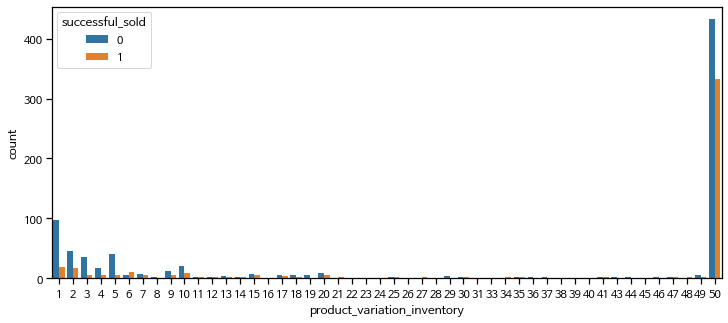

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(df['product_variation_inventory'], hue= df['successful_sold'])

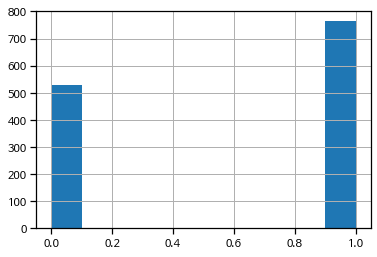

In [ ]:
inven_list = []
for i in df['product_variation_inventory']:
  if i == 50:
    inven_list.append(1)
  else:
    inven_list.append(0)

df['product_variation_inventory'] = inven_list
df['product_variation_inventory'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



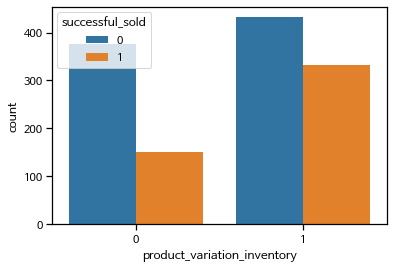

In [ ]:
sns.countplot(df['product_variation_inventory'], hue= df['successful_sold'])

In [ ]:
# 정규성검정
from scipy.stats import ks_2samp
x = df[df['product_variation_inventory']==0]['successful_sold']
y = df[df['product_variation_inventory']==1]['successful_sold']

print("x와 y:",ks_2samp(x, y))


x와 y: Ks_2sampResult(statistic=0.14857012533714103, pvalue=1.7454502927449767e-06)


In [ ]:
# 윌콕슨의 순위합 검정
stats.ranksums(x, y)

RanksumsResult(statistic=-4.545236600884214, pvalue=5.487357941997807e-06)

통계적으로 유의미하다 둘의 평균은 같지않다. 따라서 50개일경우('product_variation_inventory'이 1일경우)성공적으로 판매할 가능성이 높다.

## 가설 13. 여름이기 때문에 싼가격의 옷이 잘 팔릴것이다.

In [ ]:
pd.DataFrame(df['price'].value_counts().head(10)).style.background_gradient(cmap = 'Reds')

,price
8.0,234
11.0,169
9.0,107
6.0,102
7.0,100
12.0,71
5.0,62
14.0,50
13.0,47
16.0,33


여름옷이기 때문에 가격대가 있는 옷은 선호하지 않고 여름시즌 기준 합리적인 가격을 선호한다.

## 추가 가설) 새로 추가한 컬럼들 시각화

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   float64
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



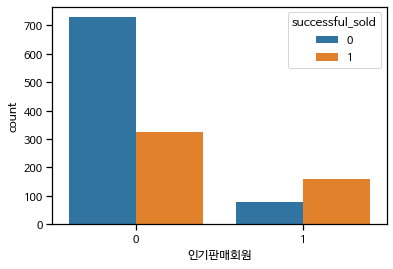

In [ ]:
sns.countplot(df['인기판매회원'],hue =  df['successful_sold'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



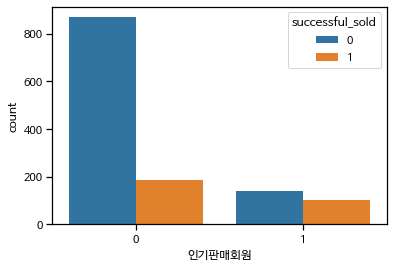

In [ ]:
sns.countplot(another_df['인기판매회원'],hue =  another_df['successful_sold'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



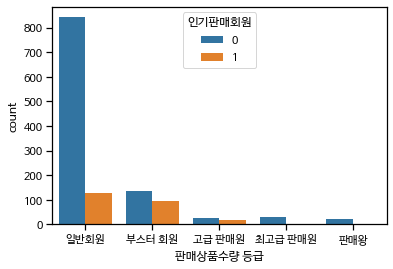

In [ ]:
sns.countplot(df['판매상품수량 등급'], hue = df['인기판매회원'])

# 모델링(업데이트중)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   float64
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

In [ ]:
# 사용하지 않는 컬럼 제거
df = df.drop(columns = ['상품판매이익','수수료','순이익','판매상품수량 등급','title', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'tags', 'product_color','quick_shipping', 'merchant_id', 'product_id' , 'made_in_china','product_url'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1292 non-null   float64
 1   uses_ad_boosts                1292 non-null   int64  
 2   rating                        1292 non-null   float64
 3   rating_count                  1292 non-null   float64
 4   badges_count                  1292 non-null   int64  
 5   badge_local_product           1292 non-null   int64  
 6   badge_product_quality         1292 non-null   int64  
 7   badge_fast_shipping           1292 non-null   int64  
 8   product_variation_inventory   1292 non-null   int64  
 9   shipping_option_price         1292 non-null   int64  
 10  shipped_range                 1292 non-null   int64  
 11  merchant_rating_count         1292 non-null   float64
 12  merchant_rating               1292 non-null   float64
 13  mer

In [ ]:
# 컬럼별로 최대값 수치 확인
for i in df.columns:
  print(i,':',df[i].var())

price : 15.762645285412427
uses_ad_boosts : 0.24606348308005407
rating : 0.20189794552906365
rating_count : 4.3786093721425345
badges_count : 0.11924900417992676
badge_local_product : 0.02047696244301495
badge_product_quality : 0.07080874259280284
badge_fast_shipping : 0.013748432227879342
product_variation_inventory : 0.24184578638010662
shipping_option_price : 0.9005666761792188
shipped_range : 0.3037197267100362
merchant_rating_count : 3.984537492486774
merchant_rating : 0.03851059250395079
merchant_has_profile_picture : 0.13147163141827412
인기판매회원 : 0.15088202919473573
successful_sold : 0.234264723868267


In [ ]:
# 컬럼별로 최대값 수치 확인
for i in df.columns:
  print(i,':',df[i].max())

price : 49.0
uses_ad_boosts : 1
rating : 5.0
rating_count : 9.940060532766969
badges_count : 3
badge_local_product : 1
badge_product_quality : 1
badge_fast_shipping : 1
product_variation_inventory : 1
shipping_option_price : 5
shipped_range : 2
merchant_rating_count : 14.592431630510214
merchant_rating : 4.6
merchant_has_profile_picture : 1
인기판매회원 : 1
successful_sold : 1


In [ ]:
# 미리 log변환시킨 컬럼 지수화 (데이터셋 분리이후 로그변환실시)
df[['rating_count', 'merchant_rating_count']] =np.expm1(df[['rating_count', 'merchant_rating_count']])

In [ ]:
# 데이터 셋 분리 
feature = df.columns.drop('successful_sold')
target = 'successful_sold'

X_train, X_test, y_train, y_test = train_test_split(df[feature], df[target], test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1033, 15), (259, 15), (1033,), (259,))

In [ ]:
from scipy import stats

# 정규화(z-score)
X_train['price'] = stats.zscore(X_train['price'])
X_test['price'] = stats.zscore(X_test['price'])

# 로그변환(log)
X_train[['rating_count', 'merchant_rating_count']] = np.log1p(X_train[['rating_count', 'merchant_rating_count']])
X_test[['rating_count', 'merchant_rating_count']] = np.log1p(X_test[['rating_count', 'merchant_rating_count']])

In [ ]:
X_train

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipped_range,merchant_rating_count,merchant_rating,merchant_has_profile_picture,인기판매회원
1067,1.088202,0,4.1,6.368187,0,0,0,0,1,3,1,8.753056,4.2,0,1
966,0.841367,1,3.6,3.931826,0,0,0,0,0,3,1,8.232972,3.8,0,0
803,1.088202,0,4.1,6.769642,0,0,0,0,1,3,1,9.712569,4.0,0,1
339,1.335037,1,4.1,4.110874,0,0,0,0,0,3,1,6.745236,3.7,0,0
667,-0.145975,0,4.1,7.180070,0,0,0,0,1,2,1,8.903408,4.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,-0.639645,1,3.8,6.918695,0,0,0,0,1,2,0,9.274816,4.1,0,0
1095,0.594531,0,3.9,6.190315,0,0,0,0,1,2,2,8.525756,4.1,0,1
1130,-0.886481,1,4.1,3.433987,0,0,0,0,1,2,1,10.689146,4.1,0,0
860,0.100861,1,4.3,6.626718,1,0,1,0,1,3,1,9.799792,4.1,0,0


In [ ]:
X_test

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipped_range,merchant_rating_count,merchant_rating,merchant_has_profile_picture,인기판매회원
351,0.797514,0,3.9,7.952263,0,0,0,0,0,3,1,9.423191,3.9,0,0
486,-0.314497,1,4.5,7.516977,1,0,1,0,1,2,1,9.074292,4.2,0,0
599,-0.314497,0,3.7,3.871201,0,0,0,0,1,2,0,9.778831,4.1,1,0
442,2.743533,0,4.6,3.555348,2,1,0,1,0,5,2,7.290293,4.2,1,0
270,0.797514,0,3.7,3.135494,0,0,0,0,0,3,2,7.465655,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,-0.870503,0,4.1,4.553877,0,0,0,0,1,2,1,9.253112,4.0,0,0
723,-0.592500,0,4.0,3.583519,0,0,0,0,1,2,0,8.085179,3.8,0,0
425,-0.314497,0,4.1,6.093570,0,0,0,0,1,2,1,7.222566,4.1,0,0
10,-0.650881,0,3.5,6.419995,0,0,0,0,0,2,0,9.155990,4.0,0,0


In [ ]:
for i in X_train.columns:
  print(i,':',X_train[i].max())

price : 9.974274020291933
uses_ad_boosts : 1
rating : 5.0
rating_count : 9.940060532766969
badges_count : 2
badge_local_product : 1
badge_product_quality : 1
badge_fast_shipping : 1
product_variation_inventory : 1
shipping_option_price : 5
shipped_range : 2
merchant_rating_count : 14.592431630510214
merchant_rating : 4.6
merchant_has_profile_picture : 1
인기판매회원 : 1


In [ ]:
for i in X_train.columns:
  print(i,':',X_train[i].var())

price : 1.0009689922480591
uses_ad_boosts : 0.2471408631441524
rating : 0.19435076581342914
rating_count : 4.39968374690434
badges_count : 0.11184027855947648
badge_local_product : 0.0180722213467208
badge_product_quality : 0.07151594287729722
badge_fast_shipping : 0.014323825390035497
product_variation_inventory : 0.24095544699340843
shipping_option_price : 0.9039281238508998
shipped_range : 0.31155961788123715
merchant_rating_count : 3.9592507177198515
merchant_rating : 0.038841786923013495
merchant_has_profile_picture : 0.13235890047052104
인기판매회원 : 0.14402620500236532


## 랜덤포레스트 모델링

In [ ]:
# 랜덤 포레스트 모델 생성
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# 파이프라인 생성 및 학습
pipe = make_pipeline(
    RandomForestClassifier(random_state = 42, n_jobs = -1,n_estimators=200, max_depth=10,min_samples_leaf= 4)
)

pipe.fit(X_train, y_train)
 
# 지수화
X_test[['rating_count', 'merchant_rating_count']] = np.expm1(X_test[['rating_count', 'merchant_rating_count']])

# 예측
y_pred = pipe.predict(X_test)




# 결과확인
print(classification_report(y_test, y_pred))


# confusion_matrix(y_test, y_pred)
# print(accuracy_score(y_test, y_pred))
# print(recall_score(y_test, y_pred))
# print(precision_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23       164
           1       0.40      1.00      0.57        95

    accuracy                           0.45       259
   macro avg       0.70      0.56      0.40       259
weighted avg       0.78      0.45      0.35       259



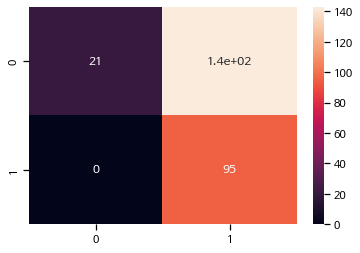

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

1차적인 모델의 결과 classification_report에서 성능도 너무 낮게 나왔으며, confusion_matrix결과역시 틀렸는데 맞다고 예측을 한 건수가 전체에서 맞출 갯수보다 더 많음을 알 수 있다...


## ROC커브를 이용한 최적의 임계값 적용(연구중)

In [ ]:
pipe.predict_proba(X_test)

array([[0.16944592, 0.83055408],
       [0.09406356, 0.90593644],
       [0.04431411, 0.95568589],
       [0.24267466, 0.75732534],
       [0.196265  , 0.803735  ],
       [0.10438043, 0.89561957],
       [0.90422079, 0.09577921],
       [0.14913336, 0.85086664],
       [0.87971515, 0.12028485],
       [0.07080719, 0.92919281],
       [0.12477279, 0.87522721],
       [0.10146165, 0.89853835],
       [0.04232759, 0.95767241],
       [0.16228201, 0.83771799],
       [0.8936976 , 0.1063024 ],
       [0.07865632, 0.92134368],
       [0.06537542, 0.93462458],
       [0.12118756, 0.87881244],
       [0.08728606, 0.91271394],
       [0.06498353, 0.93501647],
       [0.08202838, 0.91797162],
       [0.08355143, 0.91644857],
       [0.18566056, 0.81433944],
       [0.12693866, 0.87306134],
       [0.08455457, 0.91544543],
       [0.10224823, 0.89775177],
       [0.08428628, 0.91571372],
       [0.06635857, 0.93364143],
       [0.08956396, 0.91043604],
       [0.14847764, 0.85152236],
       [0.

In [ ]:
y_pred_proba = pipe.predict_proba(X_test)[:,1]
y_pred_proba

array([0.83055408, 0.90593644, 0.95568589, 0.75732534, 0.803735  ,
       0.89561957, 0.09577921, 0.85086664, 0.12028485, 0.92919281,
       0.87522721, 0.89853835, 0.95767241, 0.83771799, 0.1063024 ,
       0.92134368, 0.93462458, 0.87881244, 0.91271394, 0.93501647,
       0.91797162, 0.91644857, 0.81433944, 0.87306134, 0.91544543,
       0.89775177, 0.91571372, 0.93364143, 0.91043604, 0.85152236,
       0.90582428, 0.93211044, 0.95110928, 0.77679551, 0.89383182,
       0.01633499, 0.96141225, 0.96028908, 0.85775172, 0.96301044,
       0.89122842, 0.95285107, 0.88828006, 0.91795167, 0.91072238,
       0.06230325, 0.93200928, 0.88834515, 0.92258592, 0.94039514,
       0.92213256, 0.9472906 , 0.1567727 , 0.86266653, 0.89166759,
       0.84957411, 0.86272091, 0.89667291, 0.85456505, 0.86774353,
       0.95392256, 0.84654252, 0.96160597, 0.09585538, 0.92990245,
       0.95335469, 0.96480337, 0.90848686, 0.95147986, 0.92185077,
       0.87609949, 0.89471793, 0.9456256 , 0.81126998, 0.92127

True     238
False     21
dtype: int64

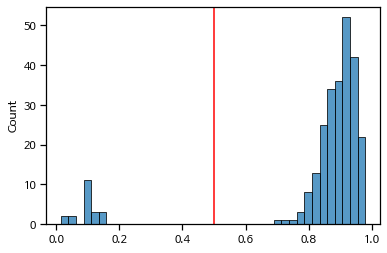

In [ ]:
# 시각화
threshold = 0.5
y_pred_proba 
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color = 'r')

pd.Series(y_pred).value_counts()

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)' : fpr,
    'TPRate(Recall)': tpr,
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.978833
1,0.000000,0.010526,0.978833
2,0.000000,0.031579,0.971084
3,0.030488,0.031579,0.962452
4,0.030488,0.042105,0.961606
...,...,...,...
105,0.817073,0.968421,0.803735
106,0.817073,0.978947,0.803572
107,0.835366,0.978947,0.793238
108,0.835366,1.000000,0.787856


Text(0, 0.5, 'TPR(Recall)')

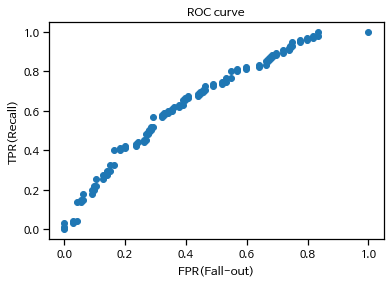

In [ ]:
# roc커브 그리기
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

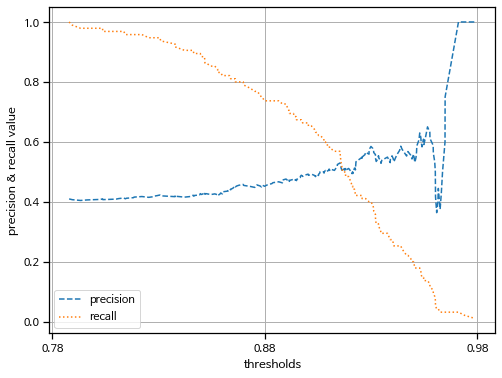

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def precision_recall_curve_plot(y_test, y_pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()


precision_recall_curve_plot(y_test, y_pred_proba)

In [ ]:
# 최적의 threshold 찾기
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 43 , threshold: 0.915295985032794


In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       164
           1       0.53      0.57      0.55        95

    accuracy                           0.66       259
   macro avg       0.63      0.64      0.64       259
weighted avg       0.66      0.66      0.66       259



In [ ]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_optimal)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.6379


In [ ]:
# 임계값을 적용하여 classfication report만들기
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.915295985032794)
y_pred_final = binarizer.fit_transform(y_pred_proba.reshape(-1,1))


print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       164
           1       0.52      0.56      0.54        95

    accuracy                           0.65       259
   macro avg       0.63      0.63      0.63       259
weighted avg       0.66      0.65      0.65       259



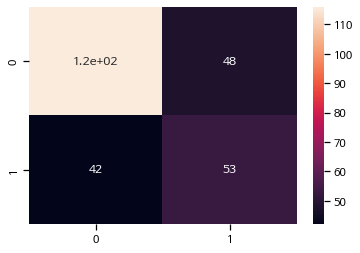

In [ ]:
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm,annot = True)

rating_count                    0.050997
인기판매회원                          0.000000
merchant_has_profile_picture    0.000000
merchant_rating                 0.000000
merchant_rating_count           0.000000
shipped_range                   0.000000
shipping_option_price           0.000000
product_variation_inventory     0.000000
badge_fast_shipping             0.000000
badge_product_quality           0.000000
badge_local_product             0.000000
badges_count                    0.000000
rating                          0.000000
uses_ad_boosts                  0.000000
price                           0.000000
dtype: float64

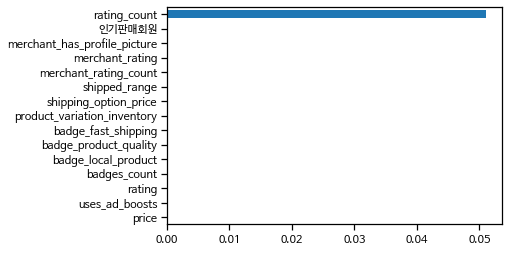

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter생성
permuter = PermutationImportance(
    pipe,
    scoring = 'f1',
    n_iter = 3,
    random_state = 42
)

# 순열중요도 계산
permuter.fit(X_test, y_test)

# 결과확인
feature_names = X_test.columns

importances = pd.Series(permuter.feature_importances_, feature_names)

importances.sort_values().plot.barh();
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

## xgboost연습(실험중)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

# 파라미터
xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}

xgb_wrapper = XGBClassifier()
grid_model = model_selection.GridSearchCV ( estimator = xgb_wrapper, param_grid = xg_parameters, scoring = 'f1', cv = 5 )
grid_model.fit(X_train, y_train)
best_params = grid_model.best_estimator_
best_params
# xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
# xgb_wrapper.fit(X_train, y_train)
# w_preds = xgb_wrapper.predict(X_test)
# w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
# get_clf_eval(y_test, w_preds)

XGBClassifier(gamma=1, max_depth=4, n_estimators=12, random_state=99)

In [ ]:
w_preds = best_params.predict(X_test)
w_pred_proba = best_params.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_preds)

오차행렬:
 [[153  11]
 [ 11  84]]

정확도: 0.9151
정밀도: 0.8842
재현율: 0.8842
F1: 0.8842
AUC: 0.9086


False    164
True      95
dtype: int64

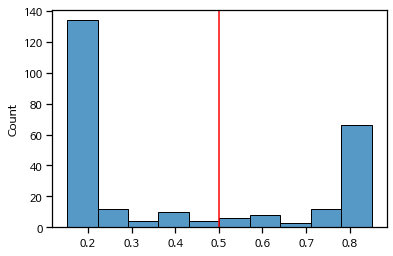

In [ ]:
threshold = 0.5
w_pred_proba
y_pred = w_pred_proba > threshold

ax = sns.histplot(w_pred_proba)
ax.axvline(threshold, color = 'r')

pd.Series(y_pred).value_counts()

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, w_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)' : fpr,
    'TPRate(Recall)': tpr,
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.850074
1,0.000000,0.684211,0.850074
2,0.000000,0.694737,0.795512
3,0.012195,0.715789,0.779733
4,0.012195,0.726316,0.766071
5,0.012195,0.768421,0.764432
6,0.012195,0.800000,0.723219
7,0.030488,0.800000,0.656856
8,0.030488,0.810526,0.622544
9,0.042683,0.810526,0.611148


Text(0, 0.5, 'TPR(Recall)')

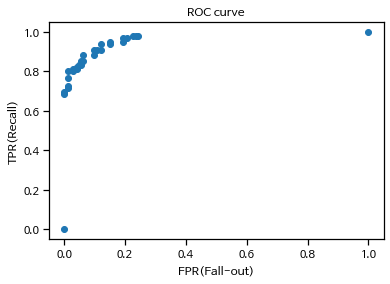

In [ ]:
# roc커브 그리기
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

In [ ]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 15 , threshold: 0.51198405


In [ ]:
# 임계값을 적용하여 classfication report만들기
from sklearn.preprocessing import Binarizer
from sklearn.metrics import classification_report

binarizer = Binarizer(threshold = 0.51198405)
y_pred_final = binarizer.fit_transform(w_pred_proba.reshape(-1,1))


print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       164
           1       0.89      0.87      0.88        95

    accuracy                           0.92       259
   macro avg       0.91      0.91      0.91       259
weighted avg       0.91      0.92      0.91       259



## 회귀모델(릿지, 라쏘, 엘라스틱넷)

# 시스템 구축(.py모델로 구상중)

In [ ]:
from scipy import stats
# 정보 받기
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o = map(float,input("정보를 입력해 주세요 : ").split('/'))
list = np.array([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o])
list = np.round(list.astype('float32'),1)
list = list.reshape(1,15)
# 데이터프레임으로 이동
test_sample = pd.DataFrame(data = list, columns = ['price', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
      'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
      'product_variation_inventory', 'shipping_option_price', 'shipped_range',
      'merchant_rating_count', 'merchant_rating',
      'merchant_has_profile_picture','인기판매회원'])


# 전처리
test_sample['rating'] = round(test_sample['rating'],1)
test_sample['product_variation_inventory'] = [1 if i == 50 else 0 for i in test_sample['product_variation_inventory']]
test_sample['shipping_option_price'] = [5 if i >=5 else i for i in test_sample['shipping_option_price']]
test_sample['merchant_rating'] = round(test_sample['merchant_rating'], 1)


# 판매 예측
test_pred = pipe.predict(test_sample)

if test_pred ==0:
  print('★★성공적으로 판매하지 못할것 같습니다.★★\n********************************************************'.center(97))
  print('---[최적화 도우미]---'.center(48),end='\n')
else:
  print('★★성공적으로 판매할 것 같습니다.★★\n********************************************************'.center(97))
  print('---[최적화 도우미]---'.center(48),end='\n')
  
if test_sample['rating'][0]<3.4:
  print('★상품 평점 관리를 해주세요★'.center(40))
if test_sample['rating_count'][0]<600:
  print('★상품 평가 수를 늘려보세요★'.center(40))
if test_sample['product_variation_inventory'][0]!=1:
  print('★최대 허용 수량을 늘려보세요★'.center(40))
if test_sample['merchant_rating_count'][0]<100 and test_sample['merchant_rating'][0]<100:
  print('★판매자 평점, 평가수 관리 해주세요★'.center(36))
if test_sample['merchant_has_profile_picture'][0] !=1:
  print('★판매자 프로필 관리를 해보세요★'.center(36))

정보를 입력해 주세요 : 8/1/3.15/6/0/0/0/0/50/2/41/12/3.1125/0/1
        ★★성공적으로 판매하지 못할것 같습니다.★★
********************************************************        
                ---[최적화 도우미]---                 
            ★상품 평점 관리를 해주세요★            
            ★상품 평가 수를 늘려보세요★            
       ★판매자 평점, 평가수 관리 해주세요★        
         ★판매자 프로필 관리를 해보세요★         


테스트용 데이터 : 8/1/3.15/6/0/0/0/0/50/2/41/12/3.1125/0/1

In [ ]:
test_sample.columns

Index(['price', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price', 'shipped_range',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', '인기판매회원'],
      dtype='object')

In [ ]:
test_sample

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipped_range,merchant_rating_count,merchant_rating,merchant_has_profile_picture,인기판매회원
0,8.0,1.0,3.2,6.0,0.0,0.0,0.0,0.0,1,2.0,41.0,12.0,3.1,0.0,1.0


permutation importance로 확인해본 결과 rating_count만 Model 에 영향을 미치는 것으로 확인되었다. 다른 사람들의 analysis report를 확인해본 결과 rating_count와 함께 움직이거나 correlation이 높은 feature들로 모델을 형성하여 예측을 하는 것을 보았다. 저러한 feature을 이용해서 하면 영향을 미치는 feature들은 늘지만 과연 도움이 되는 feature이고 model이 될 수 있는것일까??

< 현시점 까지의 결론 >

다양한 EDA 결과 여러 고객 세분화 후보군을 많이 확보하였다.이를 통해 마케팅과 기획에 있어서 중요한 자료가 될것이며, 높은 판매량은 상품의 추천수와 가장 밀접한 관련이 있는데 이는 추천이 많을수록 눈길이 가고 신뢰를 가지는 사람의 심리적 요소가 포함되어 있다고 생각한다. 따라서 지속적으로 판매를 지향하기 위해 고객군에 따른 차별화된 전략이 필요하고 좀 더 강한성능의 모델을 만들어 미리 예측하여 부족한 부분을 매일 고쳐나갈 수 있게 유도하는 방법이 좋을것 같다. 

모델의 경우  부스팅모델을 사용했을때 많은 효과가 보이나, 아직 실험이 완전히 끝내지 못하였다. 하지만 중요한것은 크롤링한 특성 목록은 예측을 위해 그렇게 좋은 테이블 구성은 아니라고 생각한다. 따라서 추천을 위해서는 다른 데이터를 더 추천하고, 해당 데이터로는 상품별로 세부적인 데이터를 뽑아  funnel, ltv, cohort등 다양한 분석을 할 수 있게 새로운 테이블을 만들어서 개인화된 시스템을 만들면 좋을것같다.

